# Data Loading

In [22]:
import pandas as pd
import numpy as np
import random

# Set seeds
np.random.seed(42)
random.seed(42)

df = pd.read_excel('DIB dataset and codebook.xlsx')

# Class Conversion
## (Add all the target columns and save the values in another column)
## (Convert those values between 0 and 1)
## (If <= 0.5, assign 0, otherwise assign 1)
## This will be our target column

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your dataframe and it already contains the OS columns

# Step 1: Add all the OS columns
df['Occupational_Stress_Sum'] = df[['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8',
                                    'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14',
                                    'OS15', 'OS16', 'OS17', 'OS18', 'OS19',
                                    'OS20', 'OS21', 'OS22', 'OS23',
                                    'OS24', 'OS25', 'OS26', 'OS27', 'OS28',
                                    'OS29', 'OS30', 'OS31',
                                    'OS32', 'OS33', 'OS34', 'OS35',
                                    'OS36', 'OS37', 'OS38', 'OS39',
                                    'OS40', 'OS41']].sum(axis=1)

# Step 2: Normalize the summed values between 0 and 1
scaler = MinMaxScaler()
df['Occupational_Stress_Normalized'] = scaler.fit_transform(df[['Occupational_Stress_Sum']])

# Step 3: Assign 0 or 1 based on the condition
df['Occupational_Stress_Target'] = df['Occupational_Stress_Normalized'].apply(lambda x: 0 if x <= 0.5 else 1)

# Optional: You might want to drop the intermediate columns if they are not needed
# df = df.drop(columns=['Occupational_Stress_Sum', 'Occupational_Stress_Normalized'])



In [24]:
df.drop(columns=['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8', 'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14', 'OS15', 'OS16', 'OS17', 'OS18', 'OS19', 'OS20', 'OS21', 'OS22', 'OS23', 'OS24', 'OS25', 'OS26', 'OS27', 'OS28', 'OS29', 'OS30', 'OS31', 'OS32', 'OS33', 'OS34', 'OS35', 'OS36', 'OS37', 'OS38', 'OS39', 'OS40', 'OS41'], inplace=True)
df = df.drop(columns=['Occupational_Stress_Sum', 'Occupational_Stress_Normalized'])

In [25]:
df.head()

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6,Occupational_Stress_Target
0,2,1,1,1,1,1,6,1,4,7,...,4,4,4,4,4,4,2,5,5,1
1,2,1,1,1,2,1,6,1,3,4,...,3,5,5,5,5,4,5,5,5,1
2,2,1,1,1,2,1,6,1,5,7,...,5,5,5,5,5,5,5,5,5,1
3,3,1,1,2,1,2,5,1,5,10,...,5,5,5,2,2,2,4,5,5,1
4,2,1,1,1,1,1,6,1,3,5,...,5,5,5,5,5,5,5,5,5,1


In [26]:
df.tail()

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6,Occupational_Stress_Target
304,4,1,1,2,2,2,6,1,5,7,...,4,4,4,5,5,5,5,5,5,1
305,2,1,1,1,2,2,9,1,5,8,...,2,2,2,4,4,2,4,4,4,0
306,2,1,1,1,3,1,6,1,5,2,...,4,5,4,5,5,5,5,5,5,1
307,3,1,1,2,1,3,5,1,5,2,...,2,2,2,4,4,4,4,4,5,0
308,2,1,1,1,2,1,6,1,5,6,...,4,4,4,4,4,4,5,5,5,0


# Data Inspection (Statistical)

In [27]:
import pandas as pd

# Assuming df is your DataFrame after loading the data and preprocessing the target column

# Step 1: Basic Structure
print("DataFrame Shape (Rows, Columns):", df.shape)
print("\nFirst 5 Rows of DataFrame:")
print(df.head())

DataFrame Shape (Rows, Columns): (309, 54)

First 5 Rows of DataFrame:
   Age  Religion  Ethnicity  Marital status  Marriage period  No. of children  \
0    2         1          1               1                1                1   
1    2         1          1               1                2                1   
2    2         1          1               1                2                1   
3    3         1          1               2                1                2   
4    2         1          1               1                1                1   

   Educational level  Employment status  Working period  Household income  \
0                  6                  1               4                 7   
1                  6                  1               3                 4   
2                  6                  1               5                 7   
3                  5                  1               5                10   
4                  6                  1               3  

In [28]:
# Step 2: Descriptive Statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())


Descriptive Statistics for Numerical Columns:
              Age    Religion   Ethnicity  Marital status  Marriage period  \
count  309.000000  309.000000  309.000000      309.000000       309.000000   
mean     2.165049    1.084142    1.129450        1.100324         1.883495   
std      0.604589    0.433246    0.560676        0.300918         0.772510   
min      1.000000    1.000000    1.000000        1.000000         1.000000   
25%      2.000000    1.000000    1.000000        1.000000         1.000000   
50%      2.000000    1.000000    1.000000        1.000000         2.000000   
75%      2.000000    1.000000    1.000000        1.000000         2.000000   
max      5.000000    4.000000    5.000000        2.000000         3.000000   

       No. of children  Educational level  Employment status  Working period  \
count       309.000000         309.000000         309.000000      309.000000   
mean          1.323625           6.019417           1.042071        4.433657   
std       

In [29]:
# Step 3: Data Types
print("\nData Types of Each Column:")
print(df.dtypes)



Data Types of Each Column:
Age                           int64
Religion                      int64
Ethnicity                     int64
Marital status                int64
Marriage period               int64
No. of children               int64
Educational level             int64
Employment status             int64
Working period                int64
Household income              int64
Sperm quality                 int64
JS1                           int64
JS2                           int64
JS3                           int64
JS4                           int64
JS5                           int64
JS6                           int64
JS7                           int64
JS8                           int64
JS9                           int64
JS10                          int64
JS11                          int64
JS12                          int64
JS13                          int64
JS14                          int64
JS15                          int64
JS16                          int64


In [30]:
# Step 4: Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Age                           0
Religion                      0
Ethnicity                     0
Marital status                0
Marriage period               0
No. of children               0
Educational level             0
Employment status             0
Working period                0
Household income              0
Sperm quality                 0
JS1                           0
JS2                           0
JS3                           0
JS4                           0
JS5                           0
JS6                           0
JS7                           0
JS8                           0
JS9                           0
JS10                          0
JS11                          0
JS12                          0
JS13                          0
JS14                          0
JS15                          0
JS16                          0
JS17                          0
JS18                          0
JS19                          0
JS20    

In [31]:
# Step 5: Unique Values in Each Column (Especially useful for categorical data)
print("\nNumber of Unique Values in Each Column:")
print(df.nunique())


Number of Unique Values in Each Column:
Age                            5
Religion                       4
Ethnicity                      5
Marital status                 2
Marriage period                3
No. of children                3
Educational level              8
Employment status              3
Working period                 5
Household income              10
Sperm quality                  8
JS1                            5
JS2                            5
JS3                            5
JS4                            5
JS5                            5
JS6                            5
JS7                            5
JS8                            5
JS9                            5
JS10                           5
JS11                           5
JS12                           5
JS13                           5
JS14                           5
JS15                           5
JS16                           5
JS17                           5
JS18                           5
JS

In [32]:
# Replace 'CATEGORICAL_COLUMN' with your actual categorical column names
for column in ['Religion', 'Ethnicity', 'Marital status']:
    print(f"\nValue Counts for {column}:")
    print(df[column].value_counts())


Value Counts for Religion:
Religion
1    297
3      8
4      3
2      1
Name: count, dtype: int64

Value Counts for Ethnicity:
Ethnicity
1    291
3     10
2      3
4      3
5      2
Name: count, dtype: int64

Value Counts for Marital status:
Marital status
1    278
2     31
Name: count, dtype: int64


# Exploratory Data Analysis (Later)

# Data Splitting

In [33]:
import pandas as pd
# import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Split the data into training and test sets
# Let's separate features and target for splitting; replace 'YourFeatures' & 'Occupational_Stress_Target' with actual column names
X = df.drop(['Occupational_Stress_Target'], axis=1)  # Features
y = df['Occupational_Stress_Target']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42) #31 diye run #manual seed diye run


# Normalization

In [34]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for easier handling
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Handle Outliers(Mean)

Age - Number of Outliers: 0


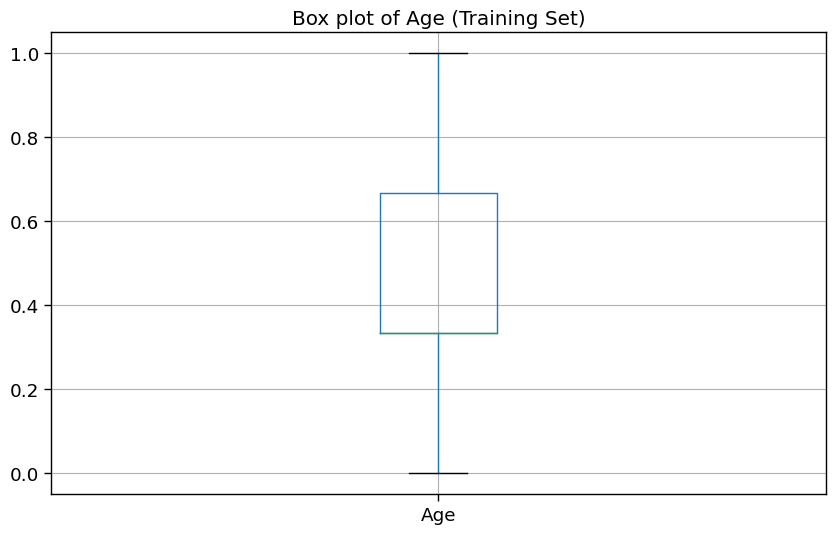

Religion - Number of Outliers: 11


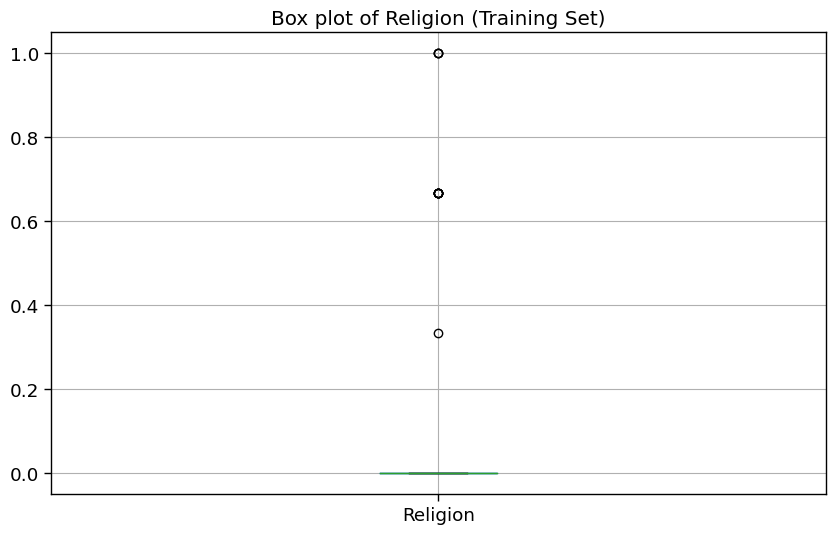

Ethnicity - Number of Outliers: 16


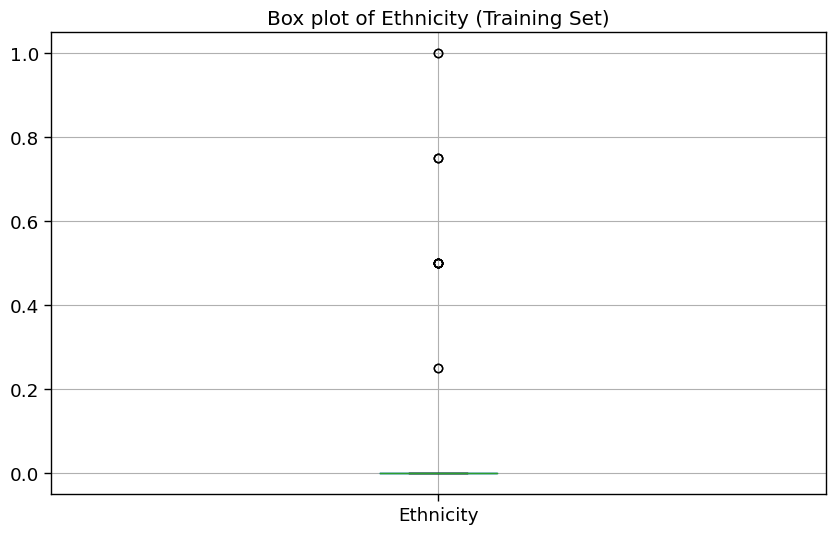

Marital status - Number of Outliers: 25


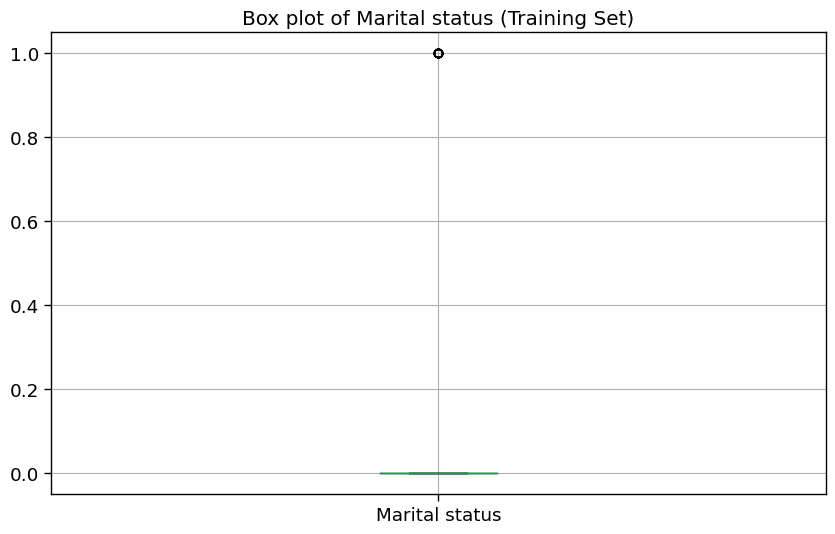

Marriage period - Number of Outliers: 0


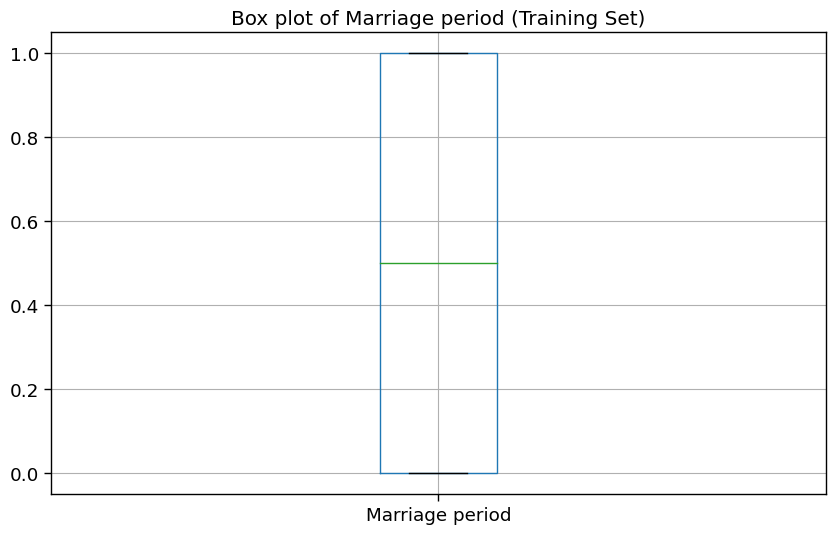

No. of children - Number of Outliers: 0


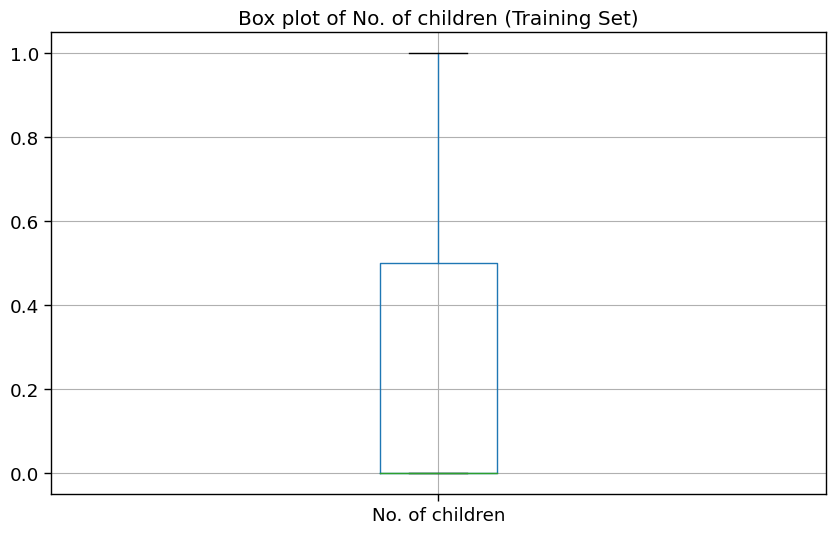

Educational level - Number of Outliers: 0


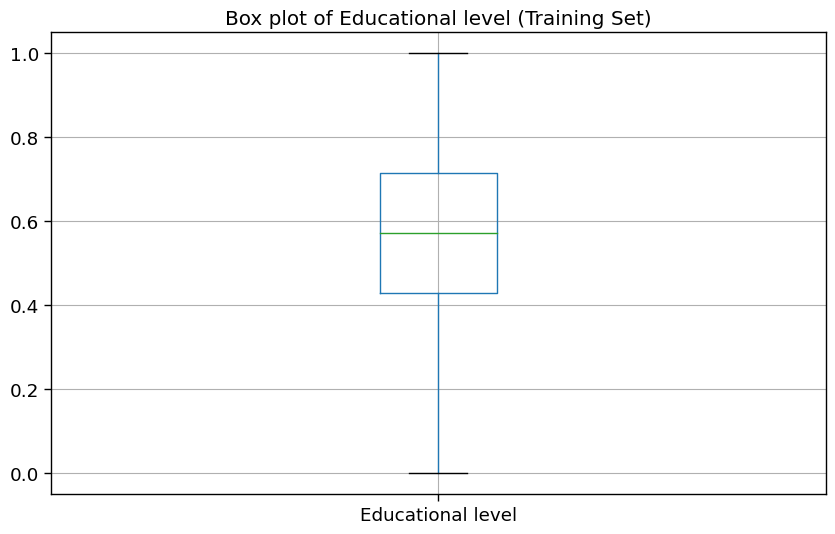

Employment status - Number of Outliers: 8


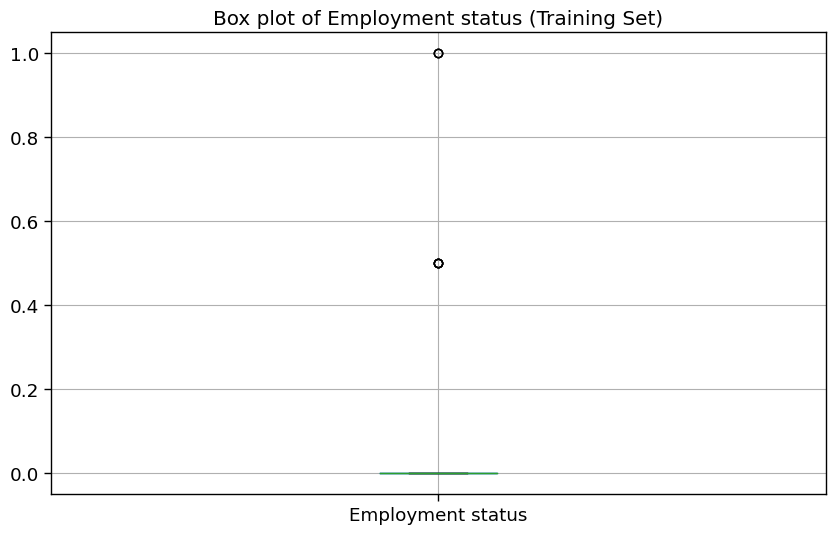

Working period - Number of Outliers: 13


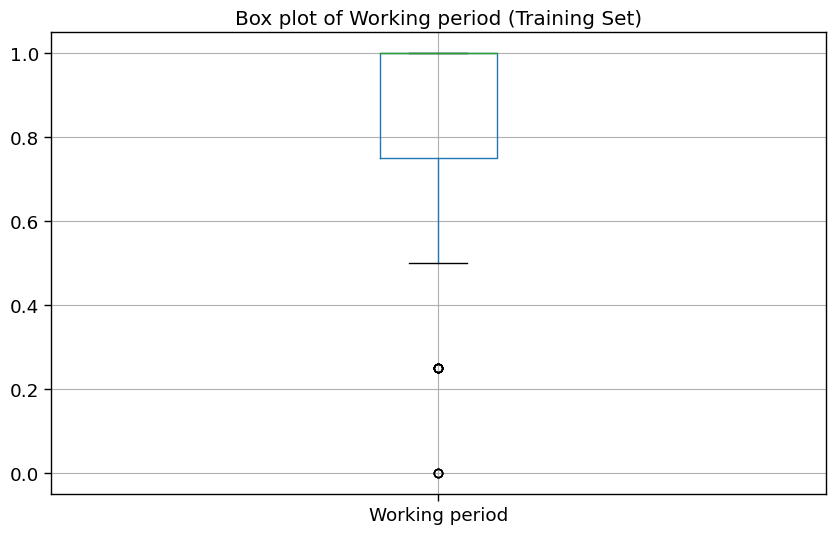

Household income - Number of Outliers: 0


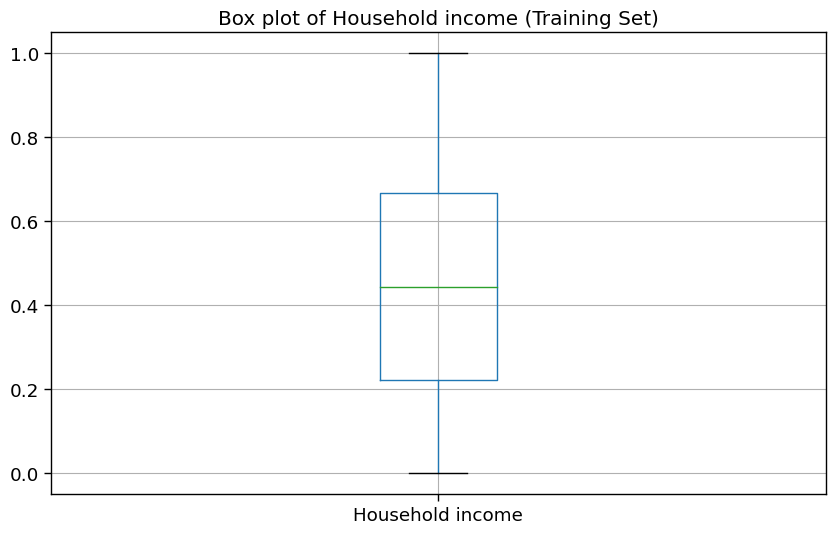

Sperm quality - Number of Outliers: 29


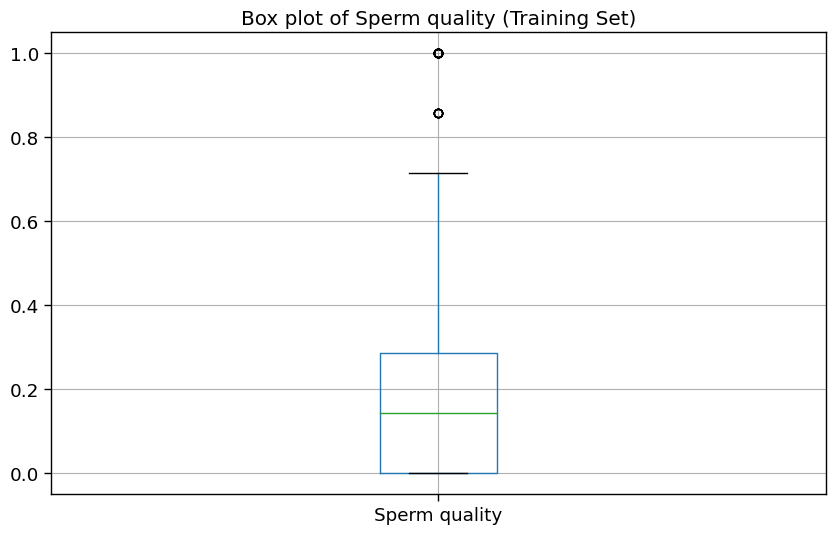

JS1 - Number of Outliers: 19


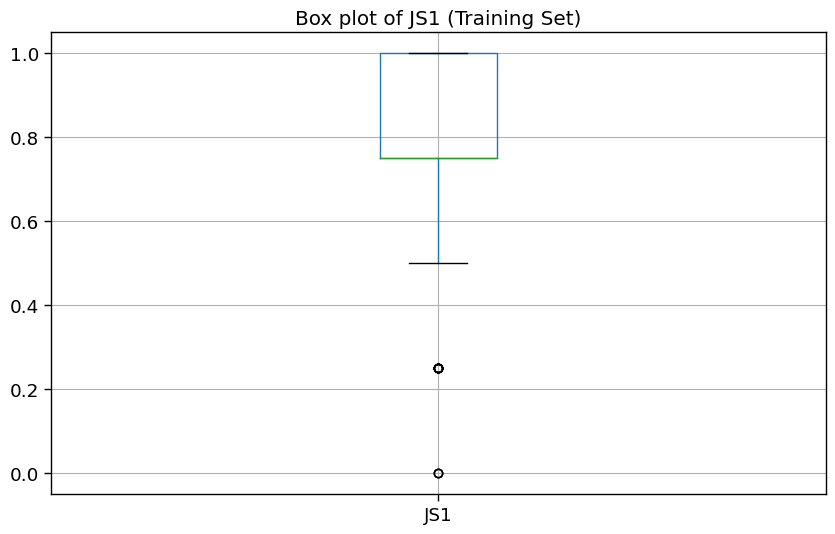

JS2 - Number of Outliers: 0


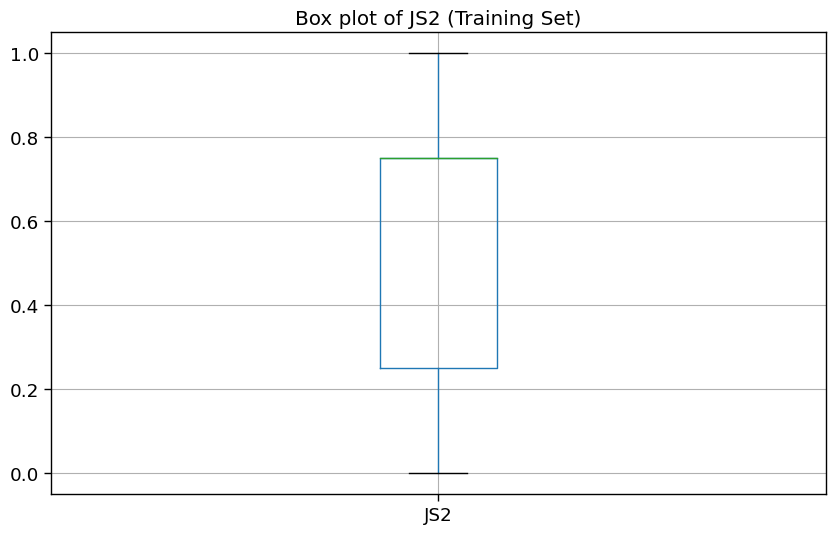

JS3 - Number of Outliers: 0


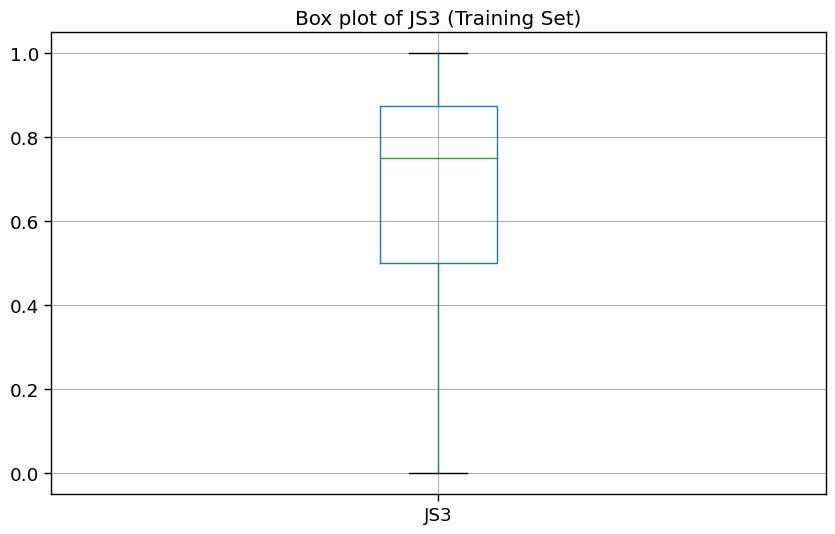

JS4 - Number of Outliers: 9


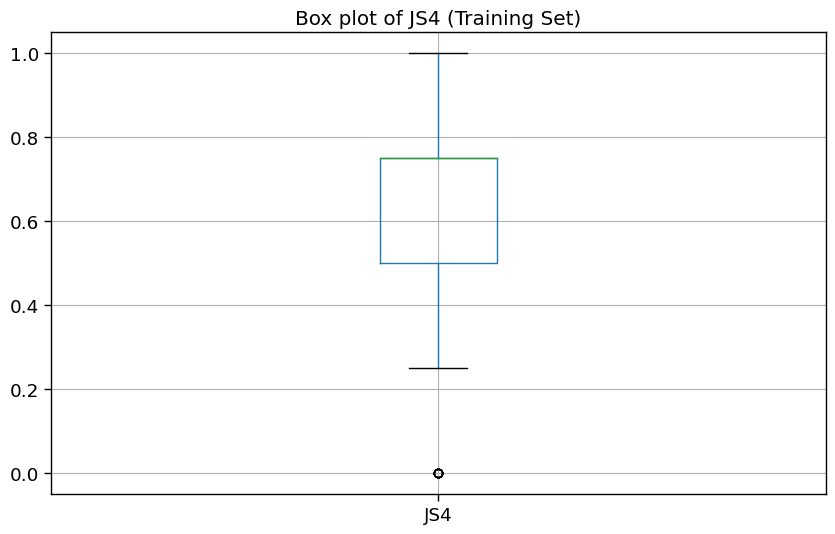

JS5 - Number of Outliers: 0


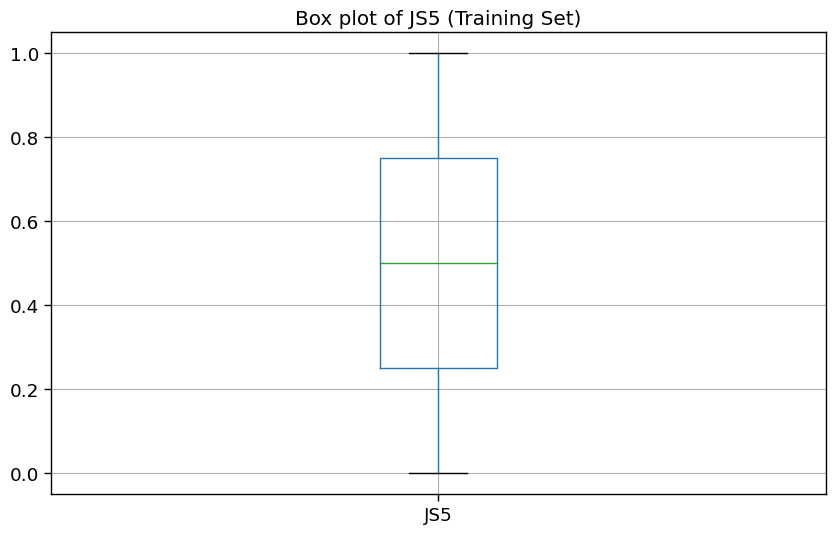

JS6 - Number of Outliers: 10


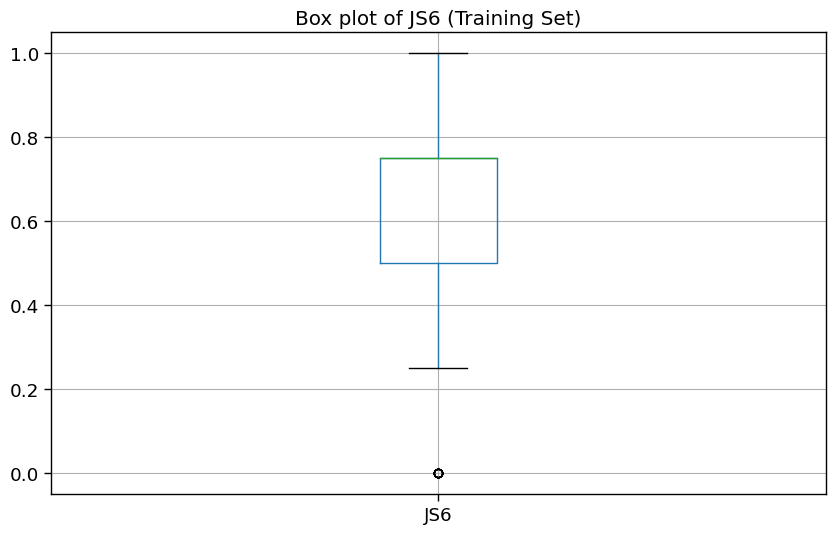

JS7 - Number of Outliers: 0


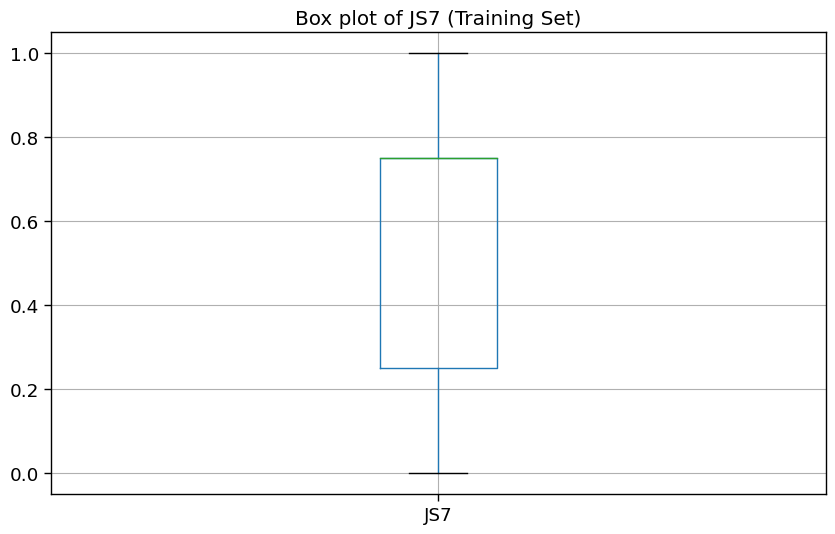

JS8 - Number of Outliers: 3


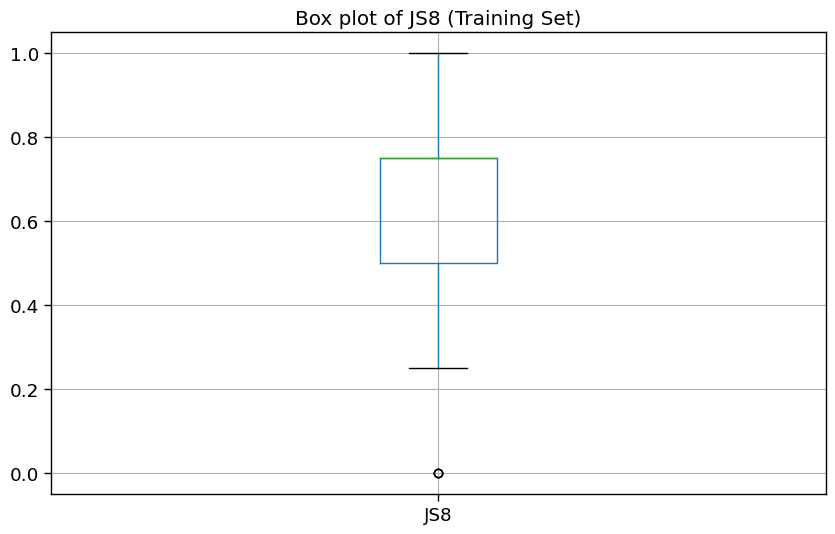

JS9 - Number of Outliers: 103


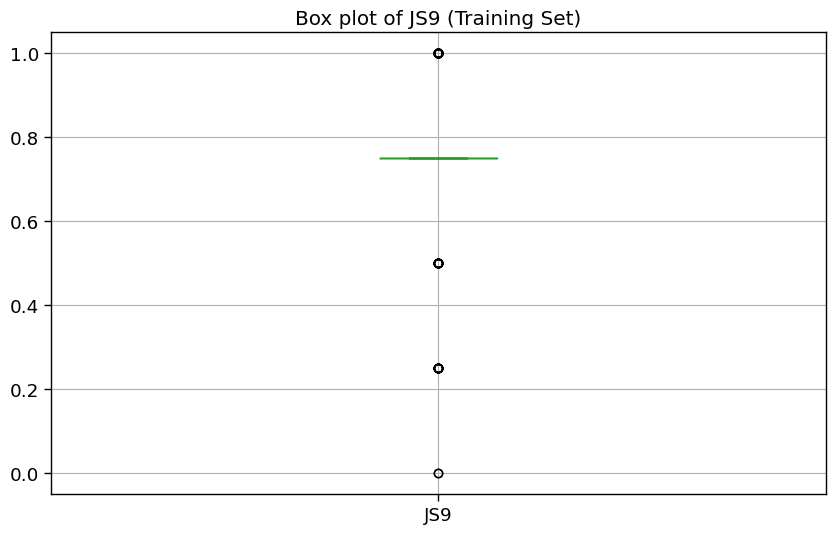

JS10 - Number of Outliers: 25


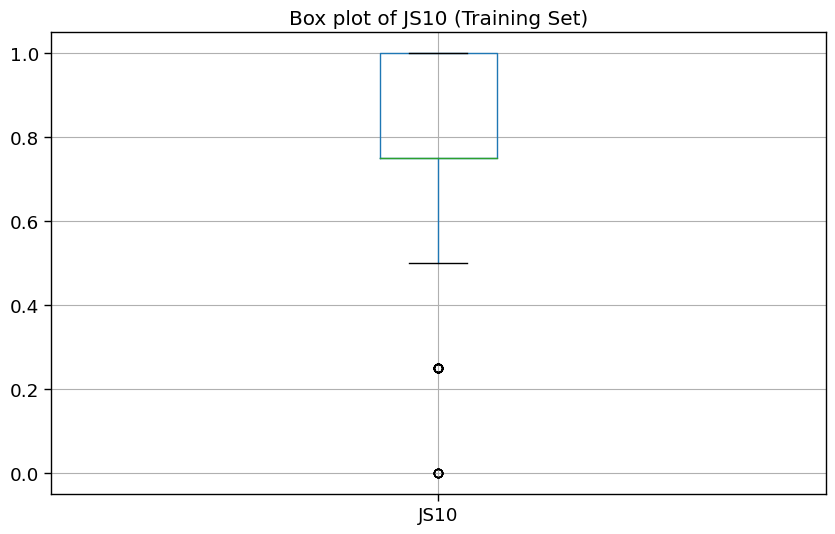

JS11 - Number of Outliers: 8


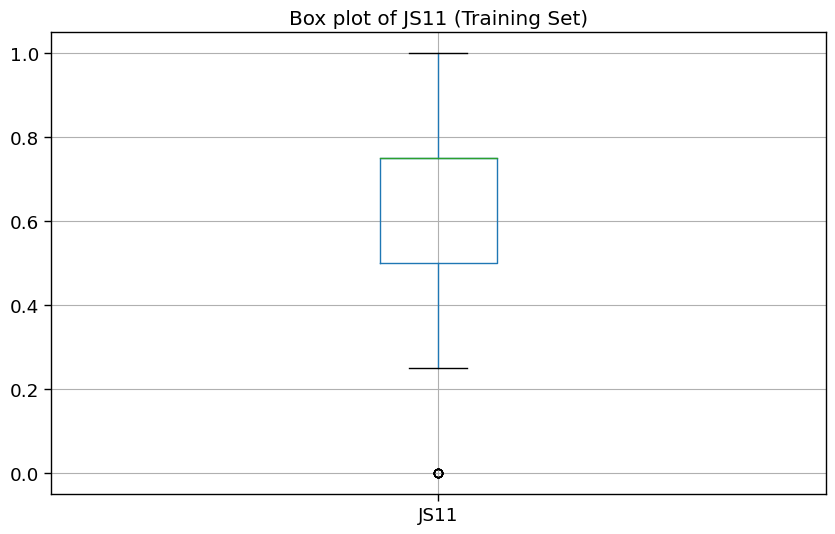

JS12 - Number of Outliers: 8


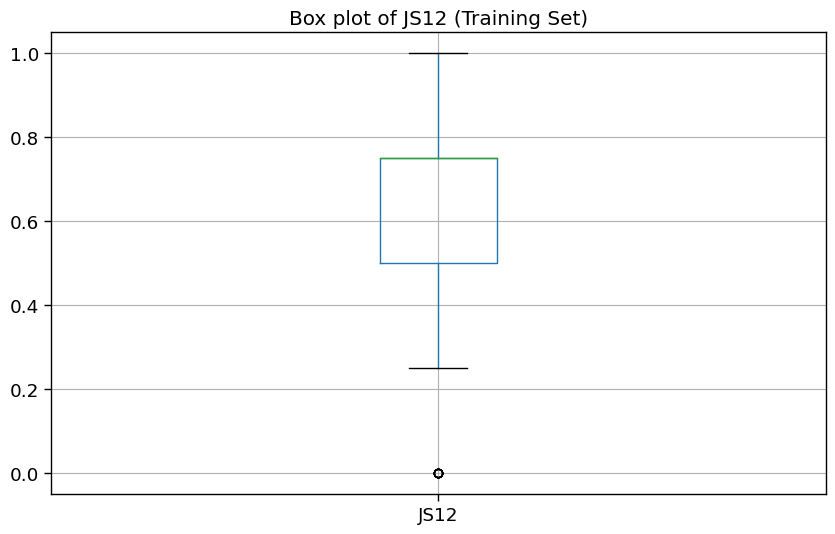

JS13 - Number of Outliers: 6


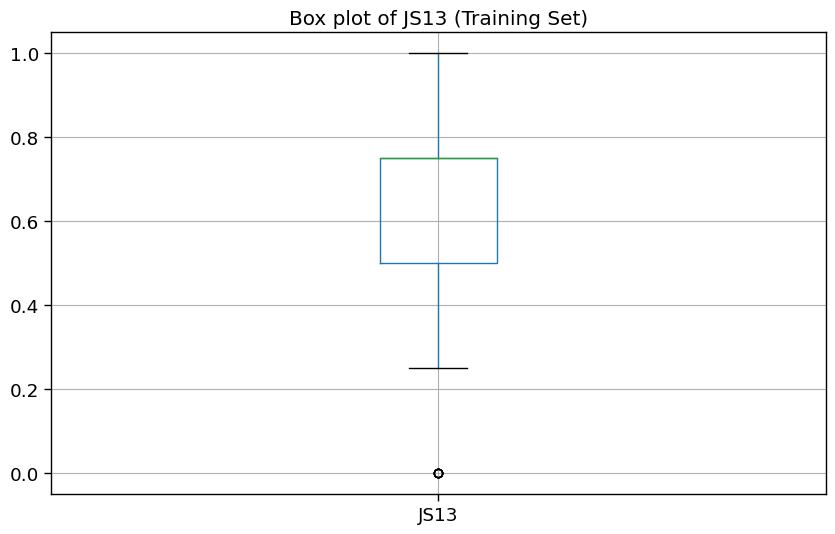

JS14 - Number of Outliers: 6


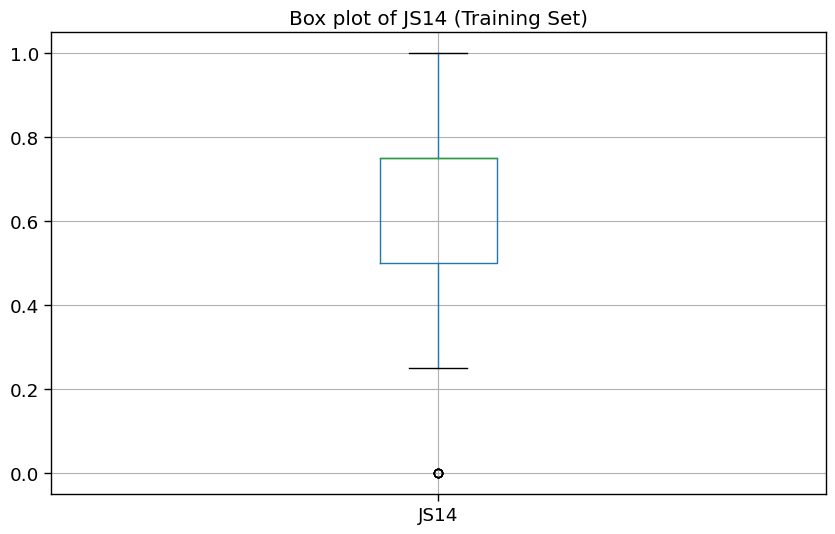

JS15 - Number of Outliers: 0


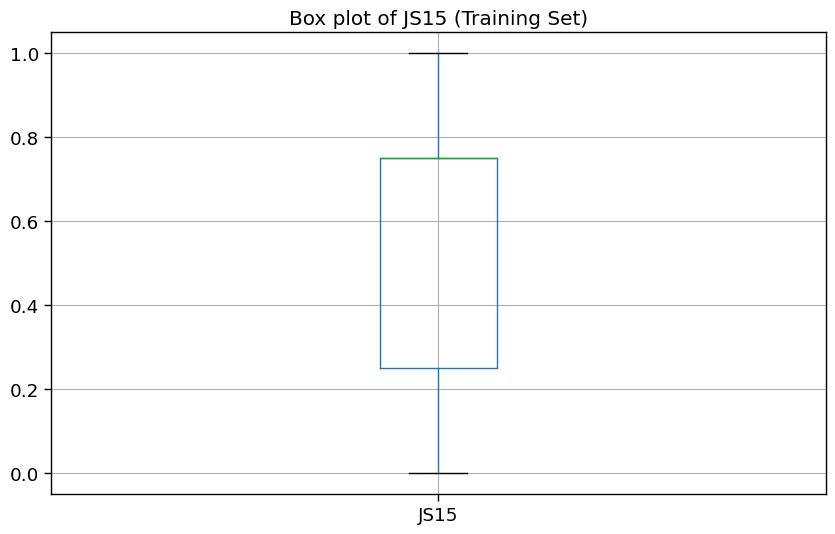

JS16 - Number of Outliers: 8


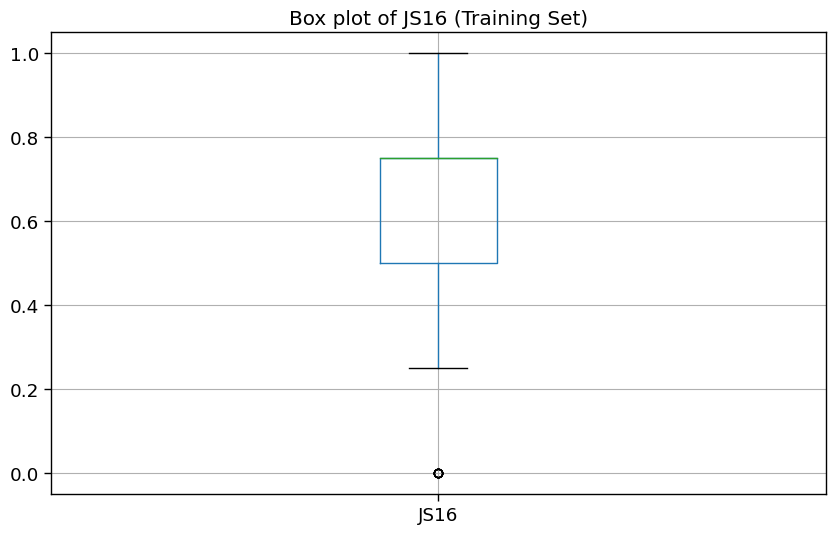

JS17 - Number of Outliers: 3


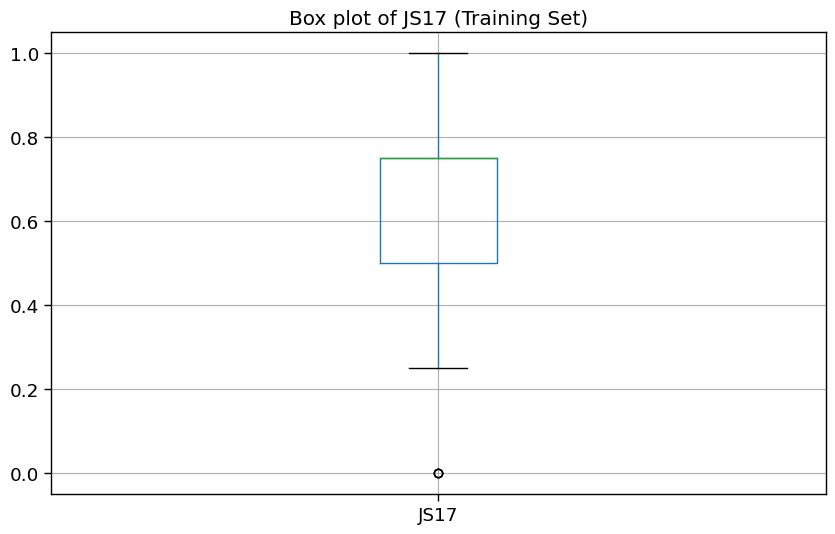

JS18 - Number of Outliers: 17


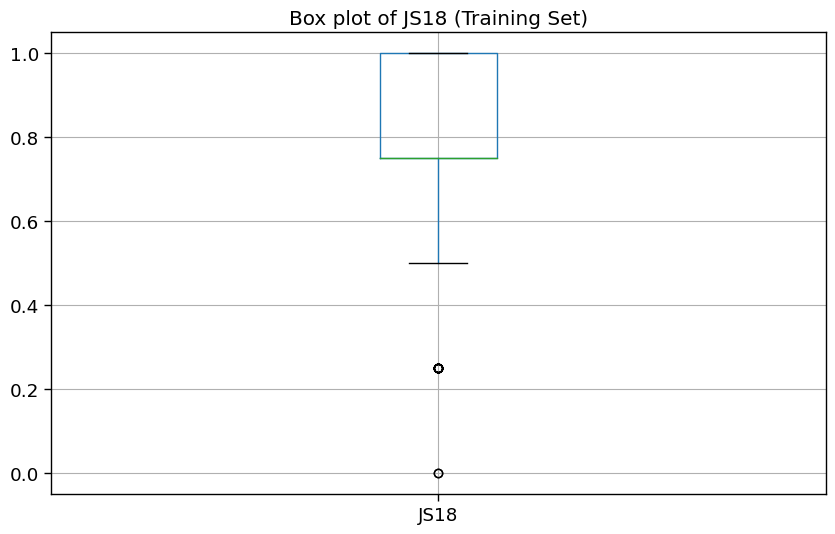

JS19 - Number of Outliers: 4


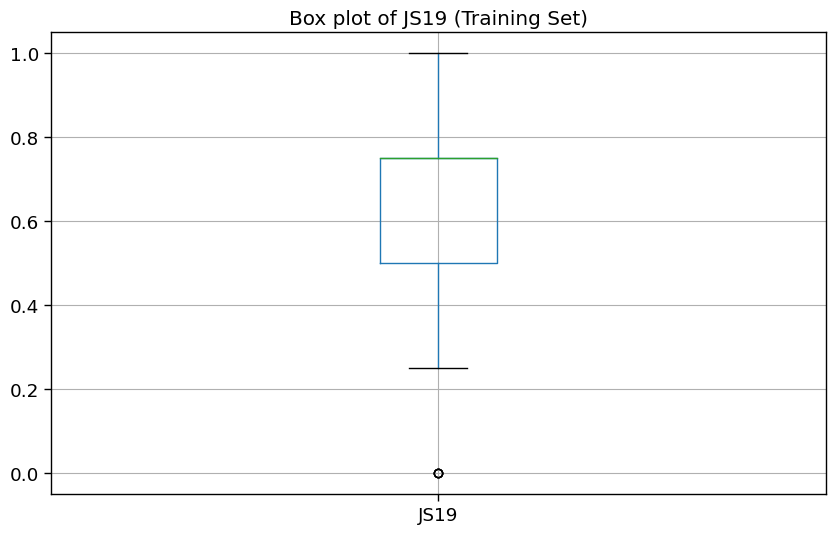

JS20 - Number of Outliers: 4


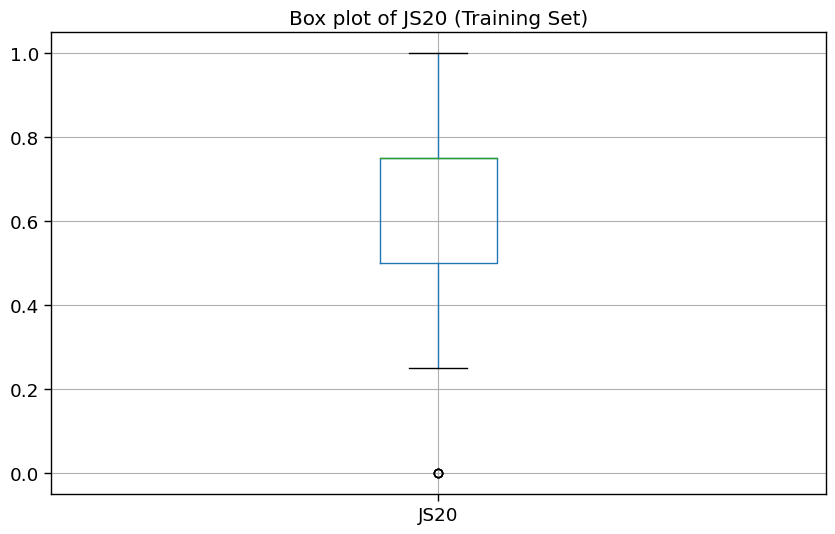

JS21 - Number of Outliers: 0


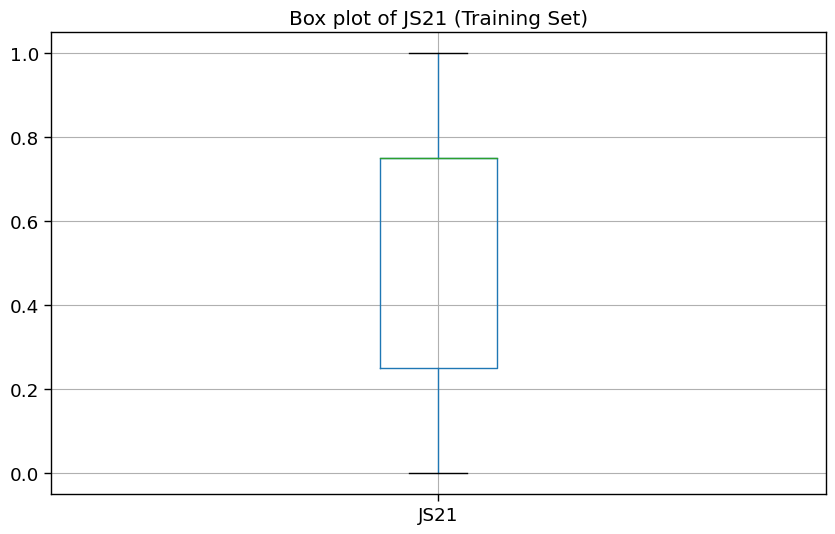

JS22 - Number of Outliers: 0


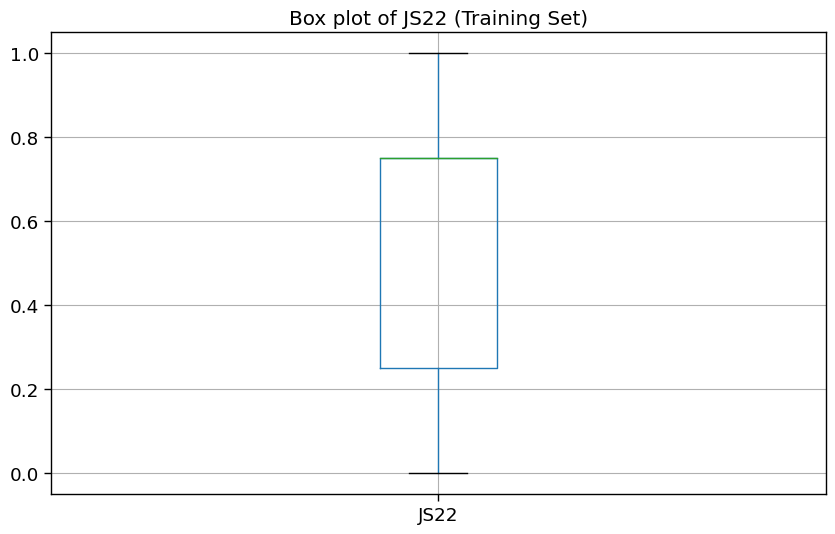

JS23 - Number of Outliers: 0


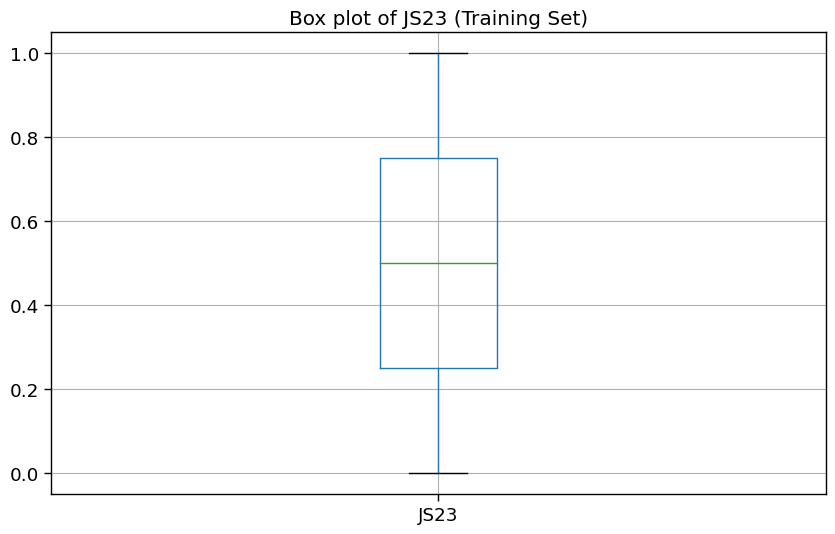

JS24 - Number of Outliers: 0


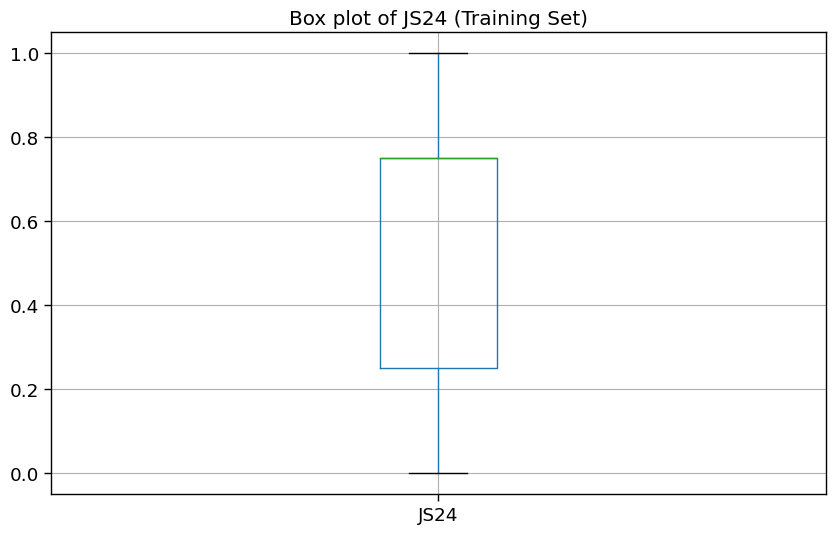

JS25 - Number of Outliers: 8


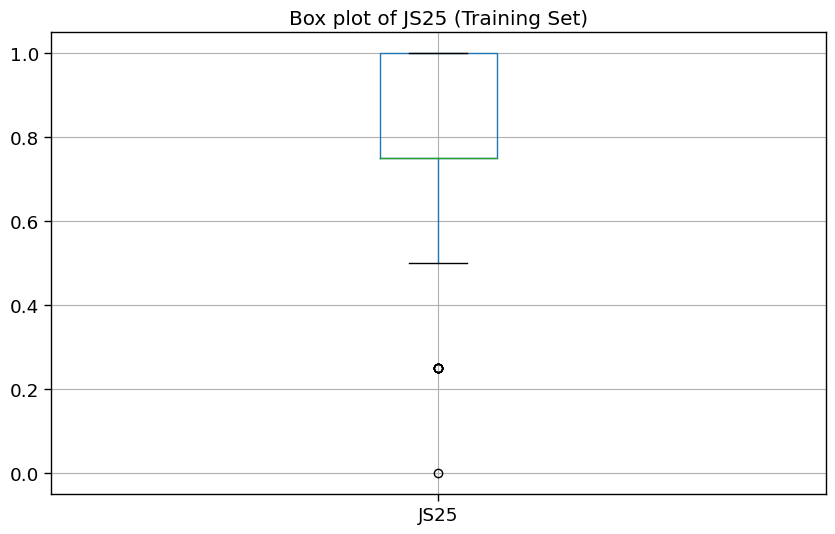

JS26 - Number of Outliers: 8


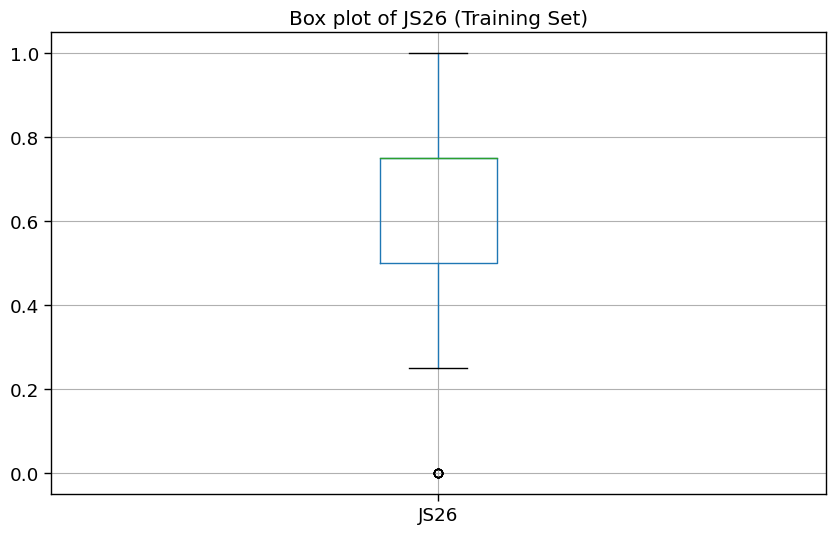

JS27 - Number of Outliers: 92


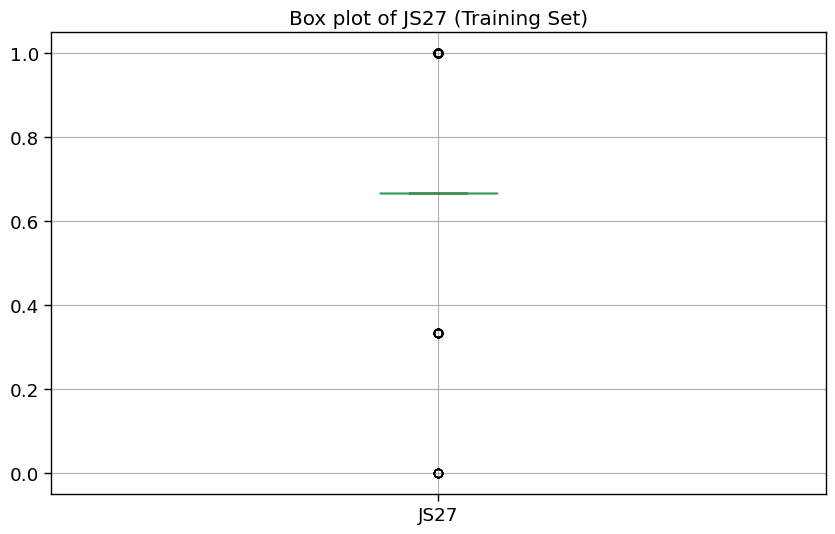

JS28 - Number of Outliers: 30


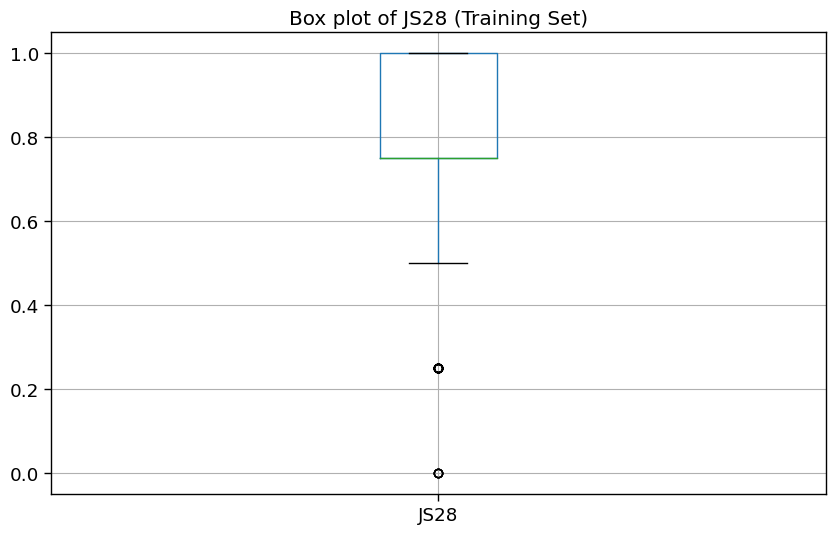

JS29 - Number of Outliers: 28


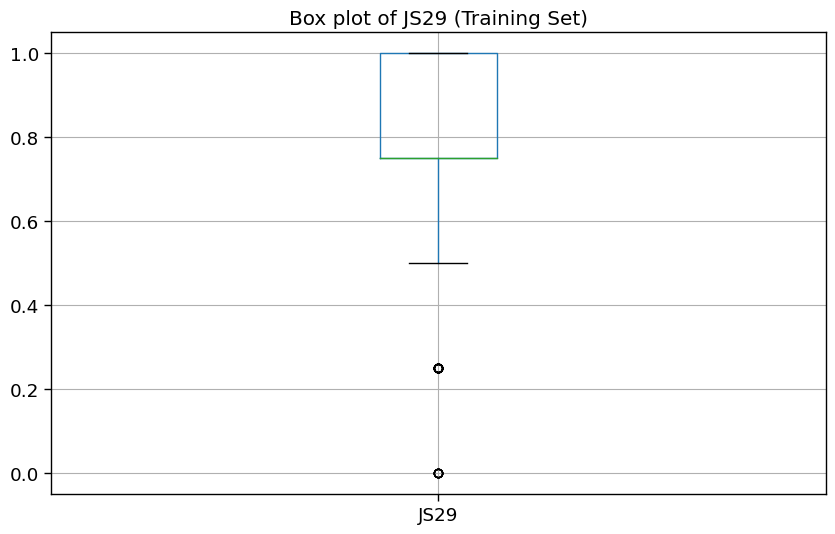

JS30 - Number of Outliers: 5


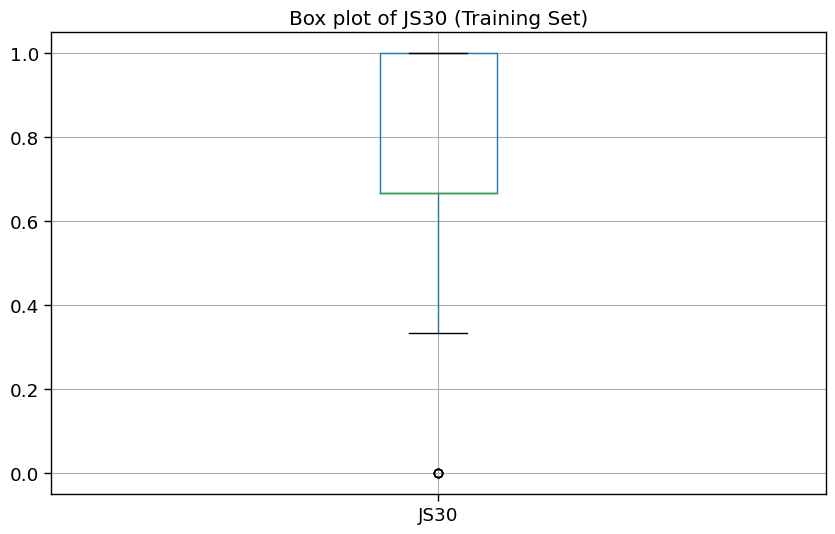

JS31 - Number of Outliers: 5


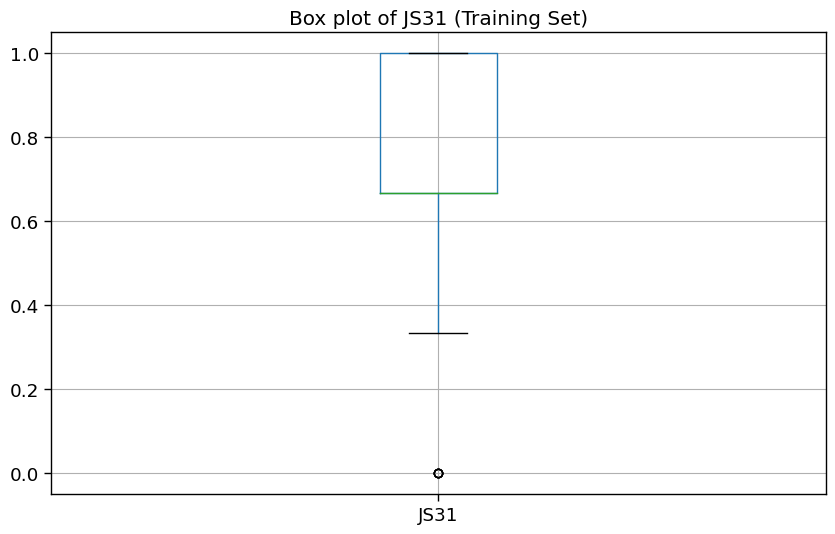

JS32 - Number of Outliers: 11


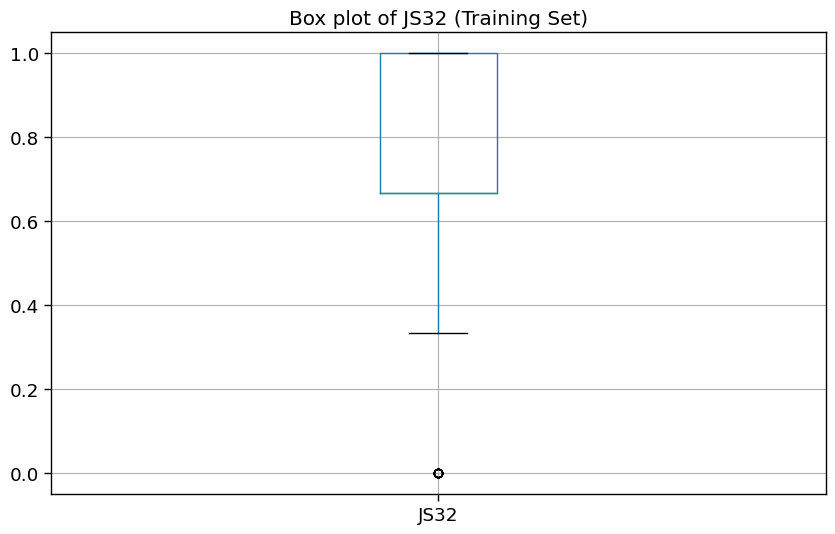

JS33 - Number of Outliers: 48


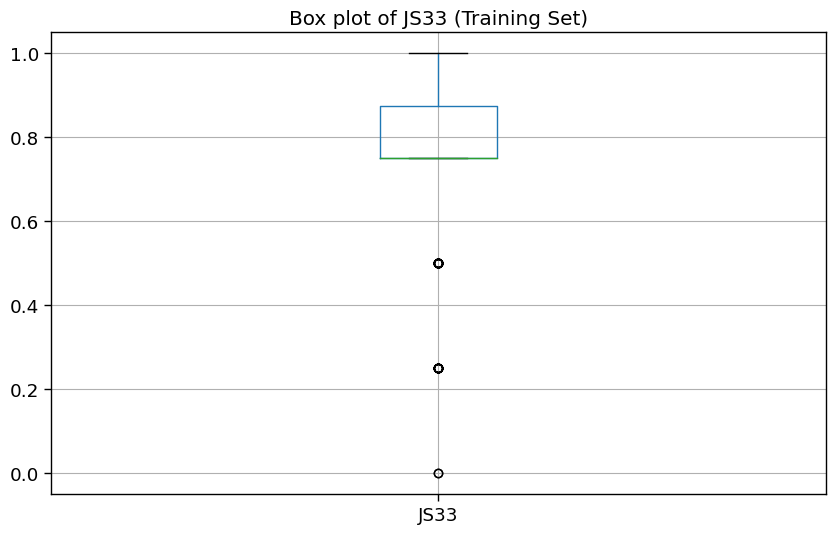

JS34 - Number of Outliers: 24


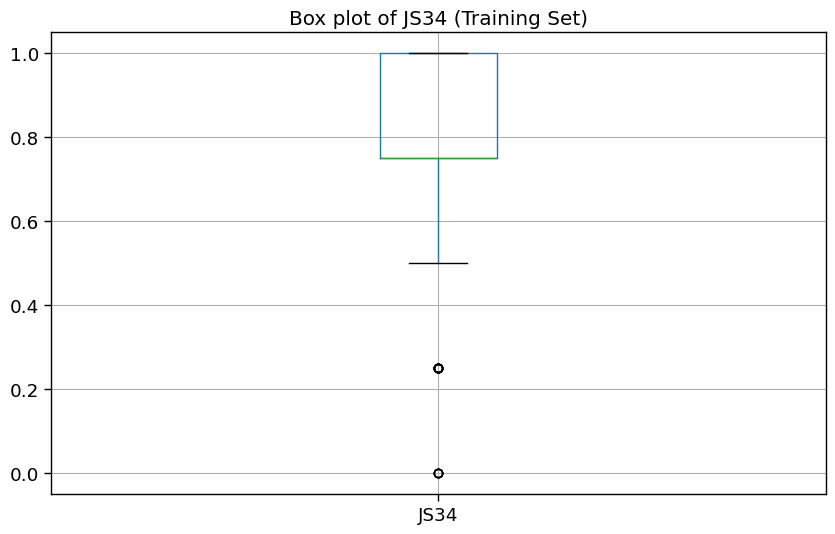

JS35 - Number of Outliers: 4


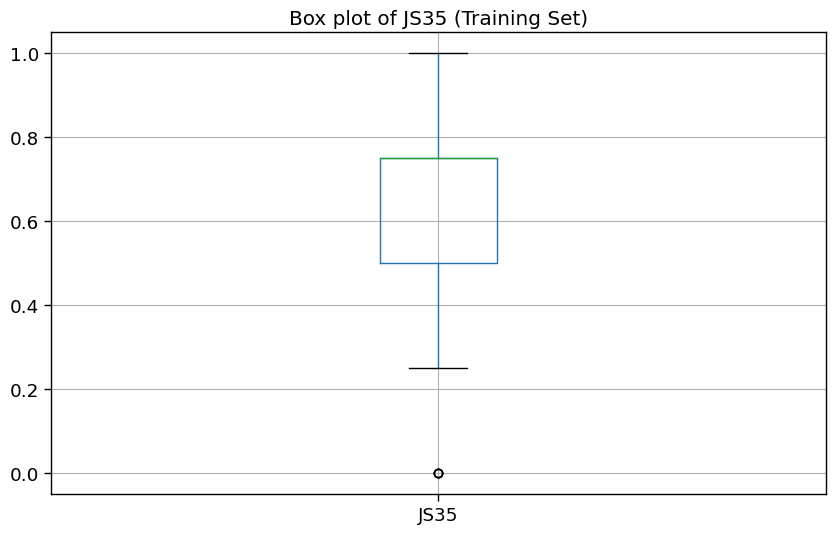

JS36 - Number of Outliers: 5


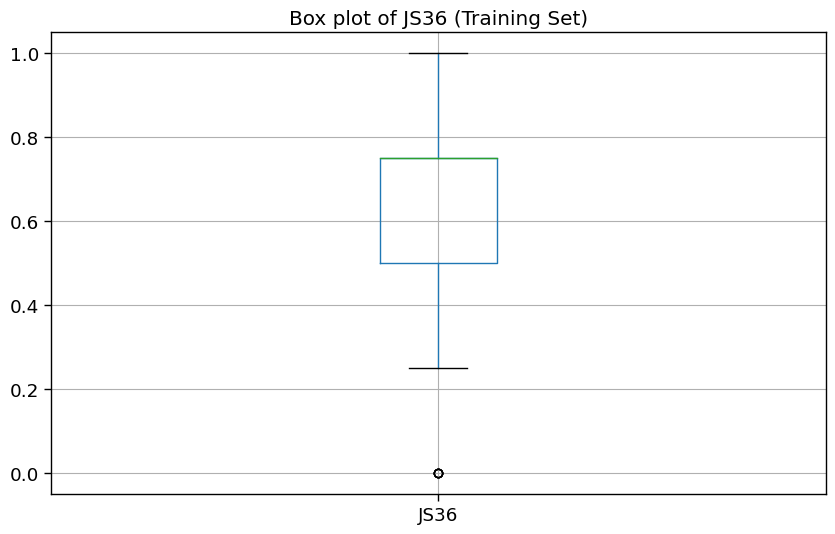

JP1 - Number of Outliers: 7


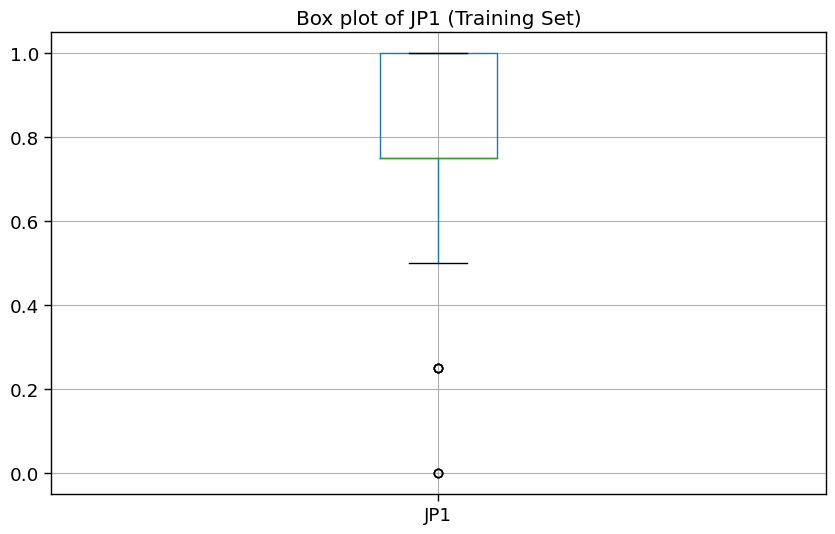

JP2 - Number of Outliers: 6


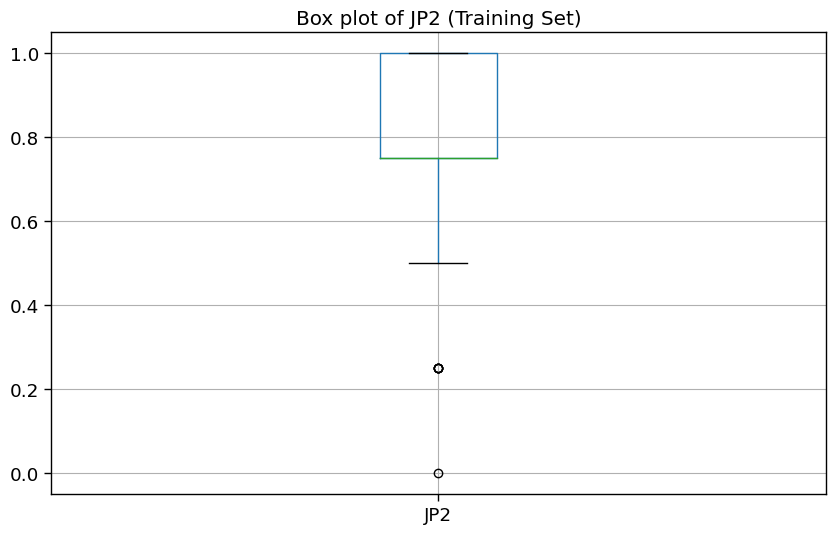

JP3 - Number of Outliers: 16


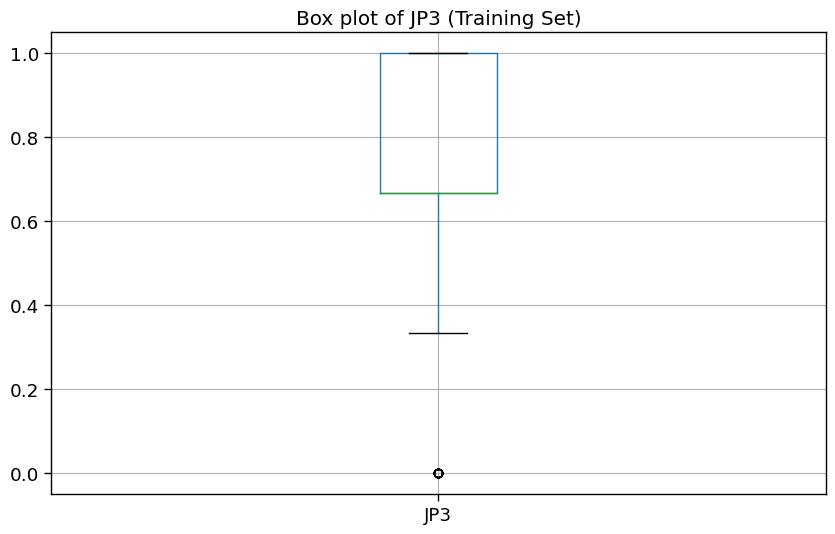

JP4 - Number of Outliers: 25


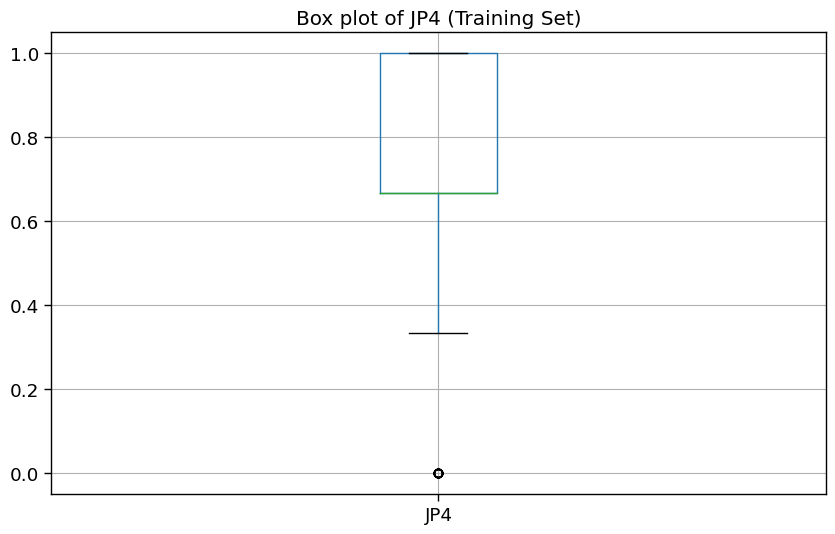

JP5 - Number of Outliers: 12


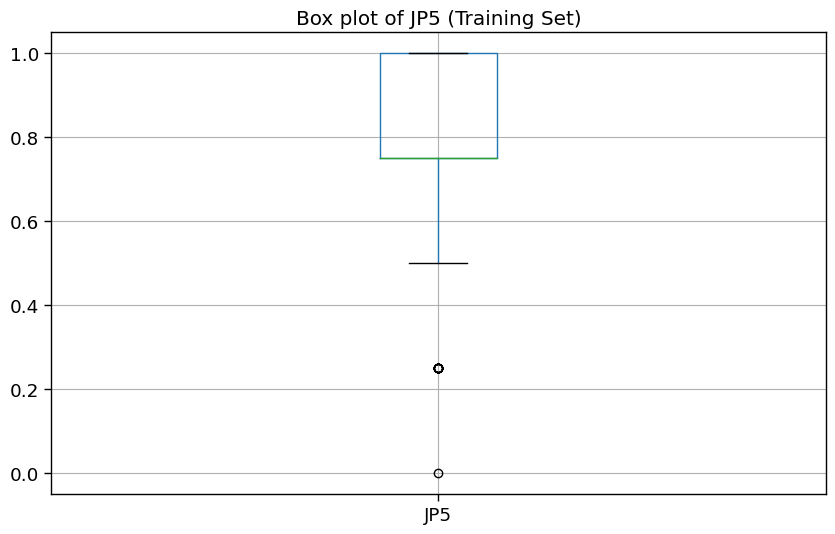

JP6 - Number of Outliers: 3


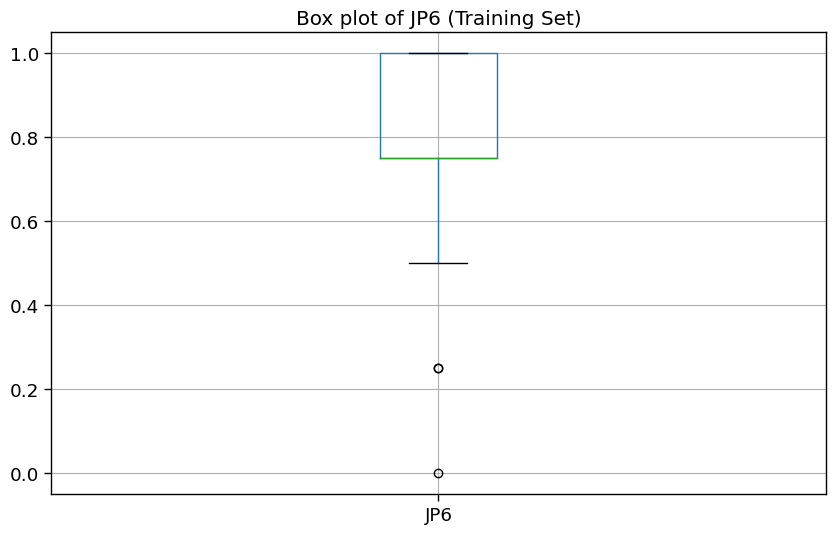

In [35]:
# Step 2: Detect and handle outliers in the training set
for column in X_train.columns:
    # Calculate IQR
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)]
    print(f"{column} - Number of Outliers: {len(outliers)}")

    # Visualize outliers with a box plot
    plt.figure(figsize=(10, 6))
    X_train.boxplot([column])
    plt.title(f"Box plot of {column} (Training Set)")
    plt.show()

    # Replace outliers with the column mean (excluding outliers)
    mean_value = X_train[(X_train[column] >= lower_bound) & (X_train[column] <= upper_bound)][column].mean()
    X_train.loc[(X_train[column] < lower_bound) | (X_train[column] > upper_bound), column] = mean_value


#Feature Selection

# ANOVA features only

In [36]:

# Combine and deduplicate feature names
combined_features = [
    "JS23", "JS35", "JS36", "JS21", "JS14", "JS17", "JS11", "JS12",
    "JS26", "JS18", "JS8", "JS30", "JS31", "JP6", "JS33", "JS27",
    "JS5", "JS7", "JS16", "JS32", "JS28", "JS13", "JS19", "JS24",
    "JS10", "JS22", "JS6", "JS15"
]

print("Total number of unique features:", len(combined_features))
print("List of unique features:", combined_features)


# Filter X_train and X_test to keep only these features
X_train_selected = X_train[combined_features]
X_test_selected = X_test[combined_features]

print(f"Shape of X_train after selection: {X_train_selected.shape}")
print(f"Shape of X_test after selection: {X_test_selected.shape}")


Total number of unique features: 28
List of unique features: ['JS23', 'JS35', 'JS36', 'JS21', 'JS14', 'JS17', 'JS11', 'JS12', 'JS26', 'JS18', 'JS8', 'JS30', 'JS31', 'JP6', 'JS33', 'JS27', 'JS5', 'JS7', 'JS16', 'JS32', 'JS28', 'JS13', 'JS19', 'JS24', 'JS10', 'JS22', 'JS6', 'JS15']
Shape of X_train after selection: (247, 28)
Shape of X_test after selection: (62, 28)


In [37]:
X_train = X_train_selected
X_test = X_test_selected

In [38]:
X_train.shape

(247, 28)

# Model Selection

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# import numpy as np



# Hyperparameter Optimization - Randomized Search CV

In [40]:
# Define model hyperparameter spaces
param_distributions = {
    'GaussianNB': {},  # Naive Bayes doesn't have relevant hyperparameters for tuning in this context
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'LGBMClassifier': {
        'num_leaves': [31, 62, 127],
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [100, 200, 300]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 6, 9]
    },
    'LinearRegression': {},  # Linear Regression typically does not need hyperparameter tuning for most cases
    'LogisticRegression': {
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear', 'lbfgs']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Instantiate models
models = {
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'LGBMClassifier': LGBMClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42),
    'LinearRegression': LinearRegression(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

best_params = {}

for model_name, model in models.items():
    print(f"Running RandomizedSearchCV for {model_name}")
    clf = RandomizedSearchCV(model, param_distributions[model_name], n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    best_params[model_name] = clf.best_params_
    print(f"Best parameters for {model_name}: {clf.best_params_}")

Running RandomizedSearchCV for GaussianNB
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for GaussianNB: {}
Running RandomizedSearchCV for DecisionTreeClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for DecisionTreeClassifier: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 50}
Running RandomizedSearchCV for RandomForestClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for RandomForestClassifier: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Running RandomizedSearchCV for AdaBoostClassifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for AdaBoostClassifier: {'n_estimators': 50, 'learning_rate': 0.1}
Running RandomizedSearchCV for LGBMClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 157, number of negative: 90
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 247, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635628 -> initscore=0.556436
[LightGBM] [Info] Start training from score 0.556436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for LogisticRegression: {'solver': 'lbfgs', 'C': 0.615848211066026}
Running RandomizedSearchCV for SVC
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVC: {'kernel': 'linear', 'C': 0.1}
Running RandomizedSearchCV for KNeighborsClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNeighborsClassifier: {'weights': 'uniform', 'n_neighbors': 5, 'metric': 'euclidean'}


# Model Training and Evaluation

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0     0.6364    0.6087    0.6222        23
           1     0.7750    0.7949    0.7848        39

    accuracy                         0.7258        62
   macro avg     0.7057    0.7018    0.7035        62
weighted avg     0.7236    0.7258    0.7245        62



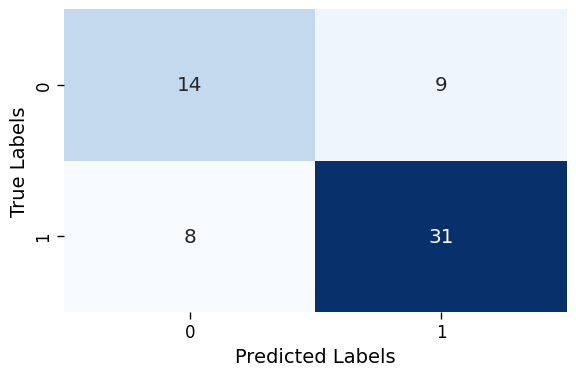

ROC-AUC Score for GaussianNB: 0.7023


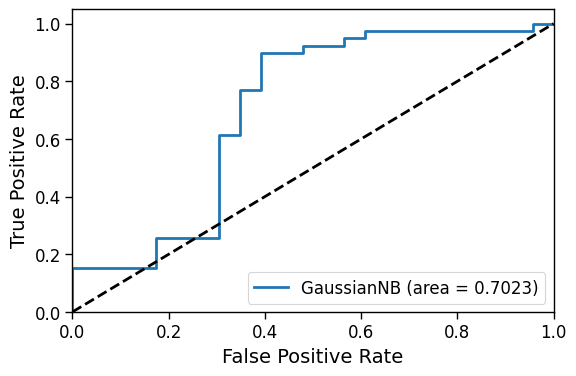

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0     0.5652    0.5652    0.5652        23
           1     0.7436    0.7436    0.7436        39

    accuracy                         0.6774        62
   macro avg     0.6544    0.6544    0.6544        62
weighted avg     0.6774    0.6774    0.6774        62



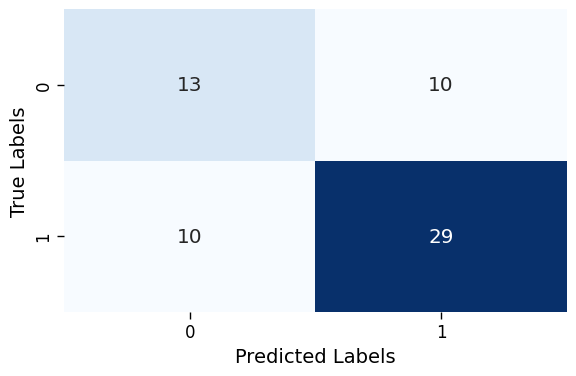

ROC-AUC Score for DecisionTreeClassifier: 0.6650


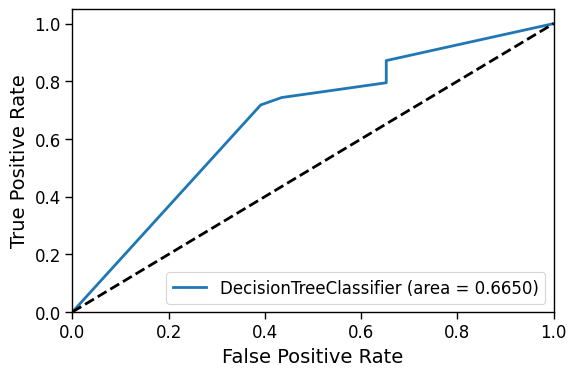

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



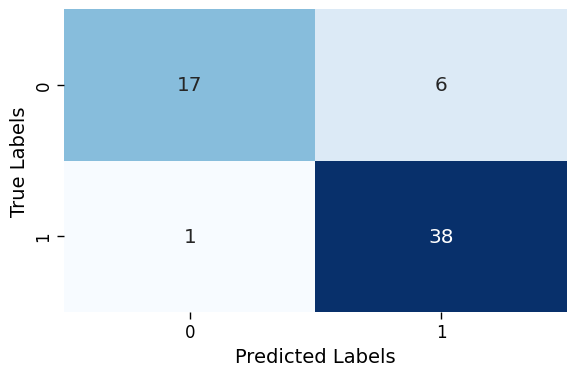

ROC-AUC Score for RandomForestClassifier: 0.8963


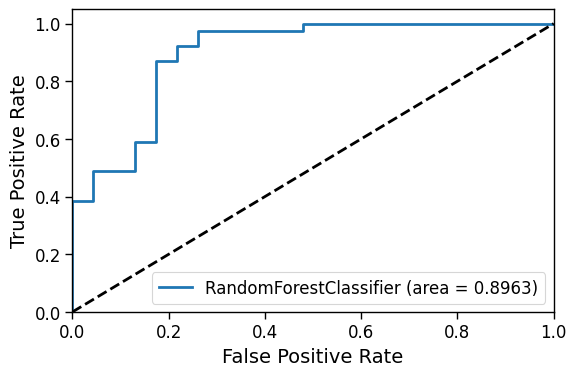

Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0     0.8824    0.6522    0.7500        23
           1     0.8222    0.9487    0.8810        39

    accuracy                         0.8387        62
   macro avg     0.8523    0.8004    0.8155        62
weighted avg     0.8445    0.8387    0.8324        62



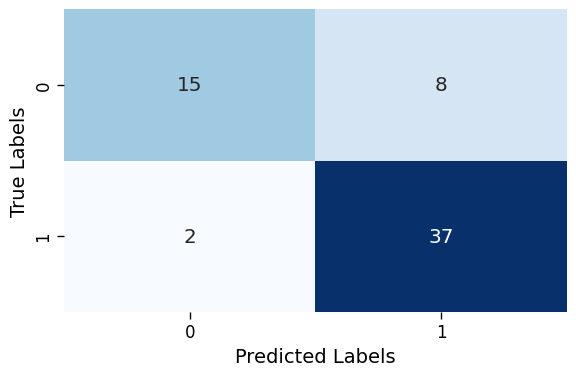

ROC-AUC Score for AdaBoostClassifier: 0.8902


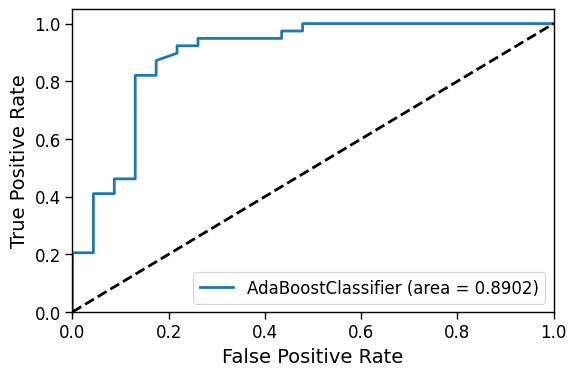

[LightGBM] [Info] Number of positive: 157, number of negative: 90
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 247, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635628 -> initscore=0.556436
[LightGBM] [Info] Start training from score 0.556436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

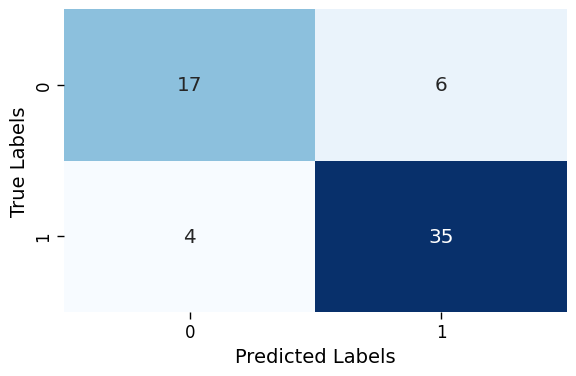

ROC-AUC Score for LGBMClassifier: 0.8963


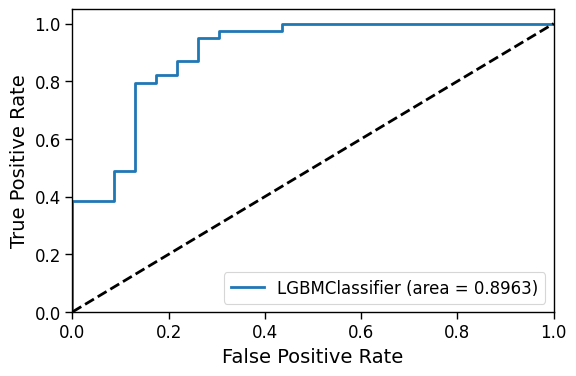

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0     0.8182    0.7826    0.8000        23
           1     0.8750    0.8974    0.8861        39

    accuracy                         0.8548        62
   macro avg     0.8466    0.8400    0.8430        62
weighted avg     0.8539    0.8548    0.8541        62



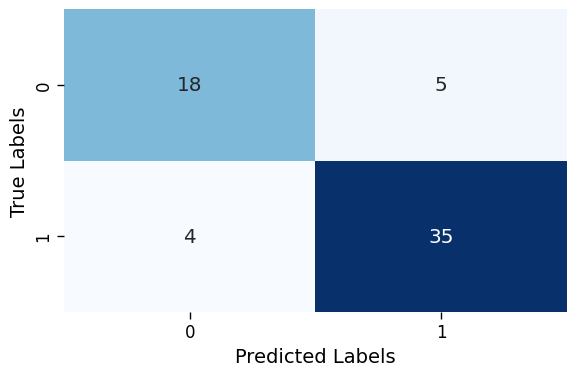

ROC-AUC Score for XGBClassifier: 0.8997


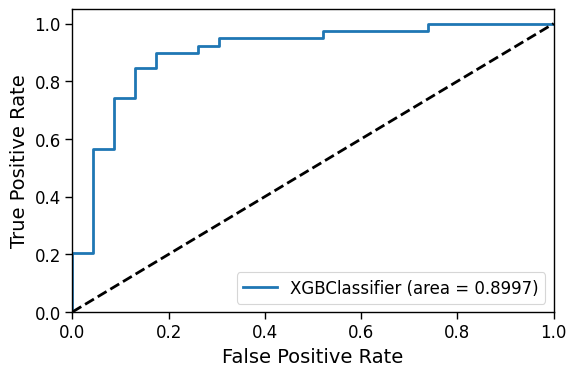

Classification Report for LinearRegression:
              precision    recall  f1-score   support

           0     0.7727    0.7391    0.7556        23
           1     0.8500    0.8718    0.8608        39

    accuracy                         0.8226        62
   macro avg     0.8114    0.8055    0.8082        62
weighted avg     0.8213    0.8226    0.8217        62



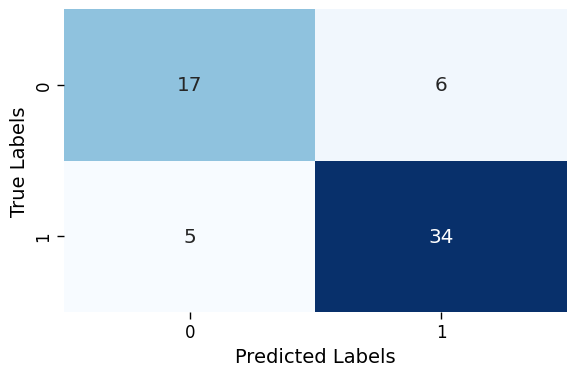

ROC-AUC Score for LinearRegression: 0.9197


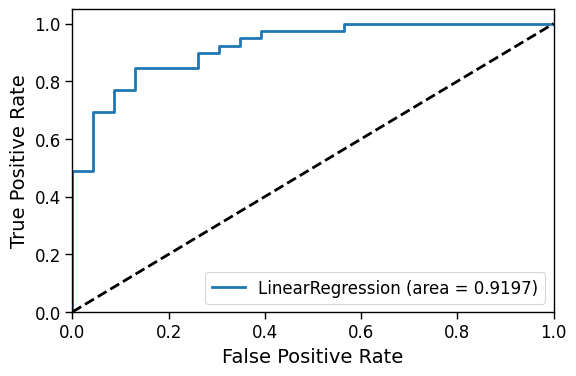

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



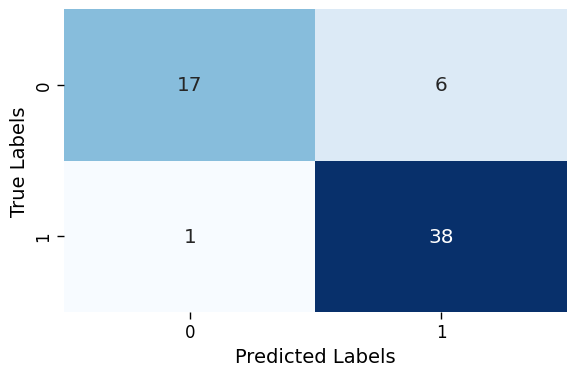

ROC-AUC Score for LogisticRegression: 0.9097


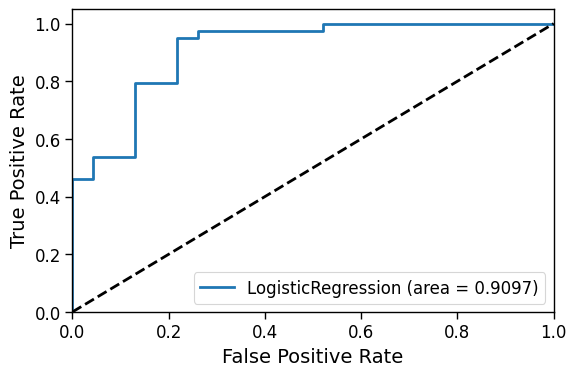

Classification Report for SVC:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



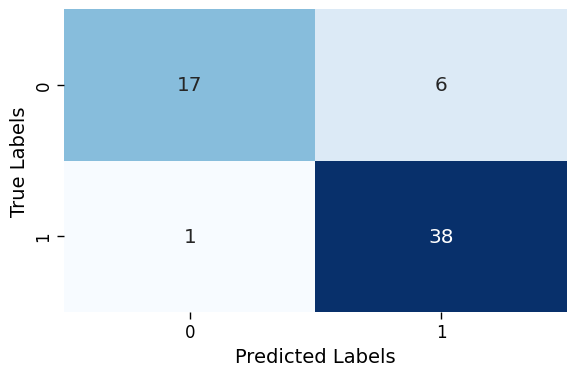

ROC-AUC Score for SVC: 0.8863


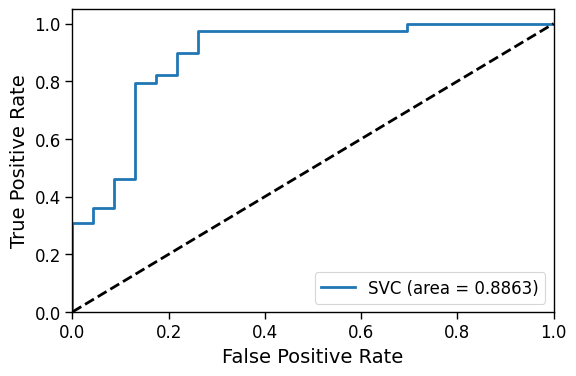

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0     0.8000    0.5217    0.6316        23
           1     0.7660    0.9231    0.8372        39

    accuracy                         0.7742        62
   macro avg     0.7830    0.7224    0.7344        62
weighted avg     0.7786    0.7742    0.7609        62



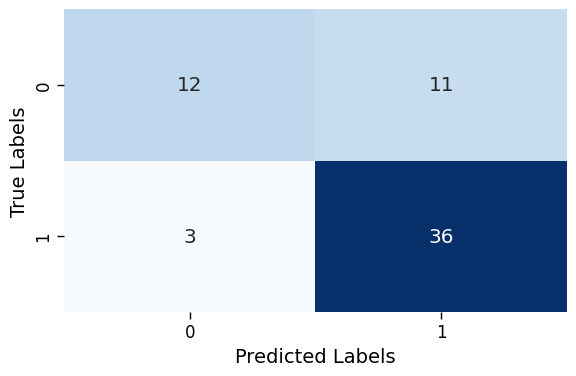

ROC-AUC Score for KNeighborsClassifier: 0.7592


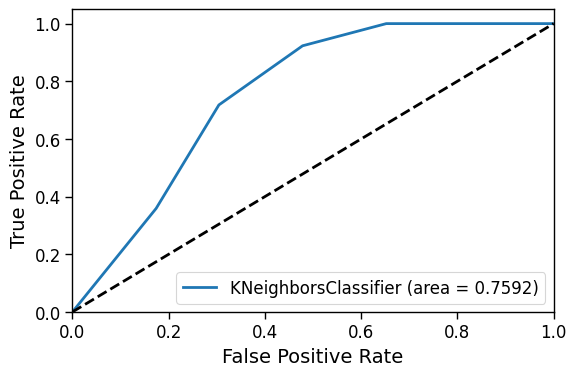

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

for model_name, model in models.items():
    # Initialize the model with the best parameters
    optimized_model = model.set_params(**best_params[model_name])

    # Train the model
    optimized_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = optimized_model.predict(X_test)

    # For LinearRegression, convert predictions to binary using a threshold
    if model_name == 'LinearRegression':
        y_pred_binary = (y_pred > 0.5).astype(int)
        y_proba = y_pred  # Use predictions as probabilities
    else:
        # For other models that support predict_proba, use it to calculate ROC-AUC
        if hasattr(optimized_model, "predict_proba"):
            y_proba = optimized_model.predict_proba(X_test)[:, 1]
        elif hasattr(optimized_model, "decision_function"):
            y_proba = optimized_model.decision_function(X_test)
        else:
            y_proba = y_pred  # If neither method is available, fall back to predictions
        y_pred_binary = y_pred

    # Print the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred_binary, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.savefig(f"{model_name}_CM.pdf", format='pdf', dpi=300)

    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {model_name}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {model_name}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.savefig(f"{model_name}_ROC.pdf", format='pdf', dpi=300)

    plt.show()


# Ensemble Model Creation (Later)

Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



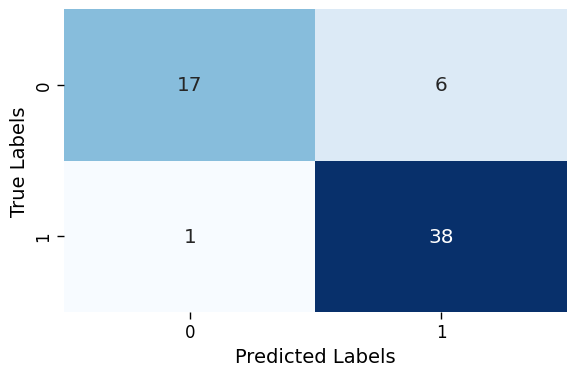

ROC-AUC Score for Hard Voting: 0.8567


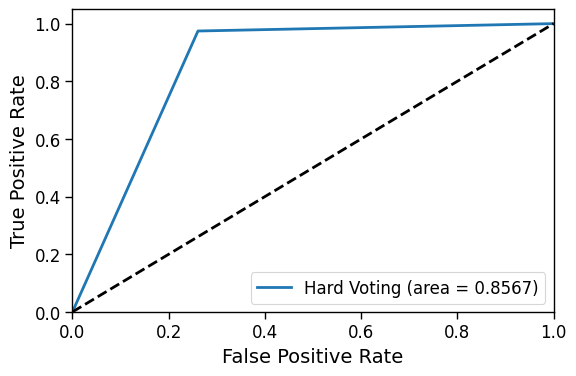


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



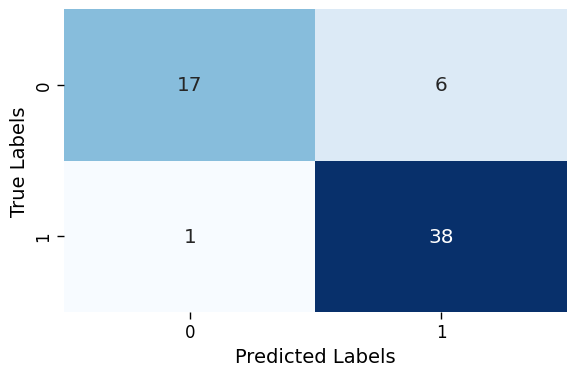

ROC-AUC Score for Soft Voting: 0.8974


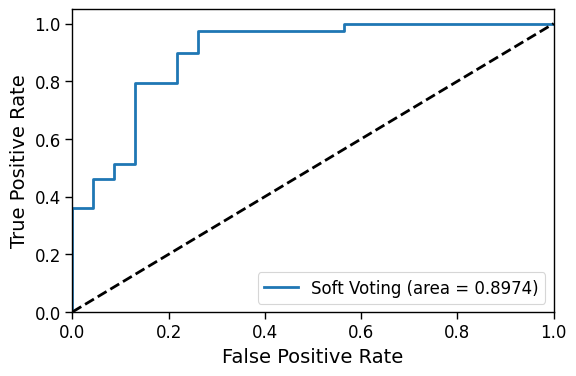

In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

# Assuming best_params dict contains optimal parameters for all models
rf_best = RandomForestClassifier(**best_params['RandomForestClassifier'])
ada_best = AdaBoostClassifier(**best_params['AdaBoostClassifier'])
xgb_best = XGBClassifier(**best_params['XGBClassifier'])
lr_best = LogisticRegression(**best_params['LogisticRegression'])
svc_best = SVC(**best_params['SVC'], probability=True)  # Enable probability for soft voting

# Create a VotingClassifier for hard voting
voting_clf_hard = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='hard'
)

# Create a VotingClassifier for soft voting
voting_clf_soft = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='soft'
)

# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig(f"{label}_CM.pdf", format='pdf', dpi=300)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig(f"{label}_ROC.pdf", format='pdf', dpi=300)
    plt.show()


# Model Interpretation (Explainable AI) (Later)

# Model Deployment

# Ablation Study